In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('display.max_colwidth',None)

In [2]:
deliveries = pd.read_csv('remaining_ballbyball.csv')
matches = pd.read_csv('remaining_match.csv')



In [3]:
df =deliveries

In [4]:
mdf =matches

In [5]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'bowler', 'non_striker', 'runs_of_bat', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
mdf.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,1359475,2023,Ahmedabad,2023-03-31,League,Rashid Khan,"Narendra Modi Stadium, Ahmedabad",Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Gujarat Titans,wickets,5.0,179.0,20.0,N,NaN,Nitin Menon,HAS Khalid


In [7]:
df.bowler.unique()

array(['Mohammed Shami', 'HH Pandya', 'J Little', 'Rashid Khan',
       'AS Joseph', 'Yash Dayal', 'DL Chahar', 'TU Deshpande',
       'RS Hangargekar', 'MJ Santner', 'RA Jadeja', 'UT Yadav',
       'TG Southee', 'SP Narine', 'CV Varun', 'SN Thakur', 'SM Curran',
       'Arshdeep Singh', 'NT Ellis', 'Sikandar Raza', 'R Dhawan',
       'RD Chahar', 'Harpreet Brar', 'KK Ahmed', 'Mukesh Kumar',
       'C Sakariya', 'AR Patel', 'Kuldeep Yadav', 'KR Mayers',
       'JD Unadkat', 'K Gowtham', 'Avesh Khan', 'MA Wood', 'Ravi Bishnoi',
       'B Kumar', 'Fazalhaq Farooqi', 'Washington Sundar', 'T Natarajan',
       'AU Rashid', 'Umran Malik', 'TA Boult', 'KM Asif', 'JO Holder',
       'R Ashwin', 'YS Chahal', 'NA Saini', 'Mohammed Siraj',
       'RJW Topley', 'Akash Deep', 'HV Patel', 'KV Sharma',
       'MG Bracewell', 'GJ Maxwell', 'JP Behrendorff', 'Arshad Khan',
       'JC Archer', 'PP Chawla', 'C Green', 'HR Shokeen', 'KH Pandya',
       'Yash Thakur', 'BA Stokes', 'MM Ali', 'A Nortje', 'M

In [8]:
mdf.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [9]:
# Dictionary mapping IPL bowlers to their bowling types
bowler_types = {
    # Fast / Fast-Medium Bowlers (default group)
    "Mohammed Shami": "Right-arm Fast-Medium",
    "AS Joseph": "Right-arm Fast",
    "Yash Dayal": "Left-arm Fast-Medium",
    "TU Deshpande": "Right-arm Medium-Fast",
    "RS Hangargekar": "Right-arm Fast",
    "UT Yadav": "Right-arm Fast",
    "TG Southee": "Right-arm Fast-Medium",
    "SN Thakur": "Right-arm Medium-Fast",
    "Arshdeep Singh": "Left-arm Fast-Medium",
    "KK Ahmed": "Left-arm Fast-Medium",
    "Mukesh Kumar": "Right-arm Medium",
    "C Sakariya": "Left-arm Medium",
    "KR Mayers": "Right-arm Medium",
    "MA Wood": "Right-arm Fast",
    "Avesh Khan": "Right-arm Fast",
    "Mohammed Siraj": "Right-arm Fast",
    "RJW Topley": "Left-arm Fast-Medium",
    "Akash Deep": "Right-arm Medium-Fast",
    "HV Patel": "Right-arm Medium-Fast",
    "JP Behrendorff": "Left-arm Fast-Medium",
    "Yash Thakur": "Right-arm Medium-Fast",
    "A Nortje": "Right-arm Fast",
    "MR Marsh": "Right-arm Medium",
    "LH Ferguson": "Right-arm Fast",
    "WD Parnell": "Left-arm Medium-Fast",
    "RP Meredith": "Right-arm Fast",
    "Mustafizur Rahman": "Left-arm Medium",
    "Akash Singh": "Left-arm Medium",
    "MM Sharma": "Right-arm Fast",
    "K Rabada": "Right-arm Fast",
    "Vijaykumar Vyshak": "Right-arm Medium-Fast",
    "Yudhvir Singh": "Right-arm Medium-Fast",
    "D Jansen": "Left-arm Fast-Medium",
    "M Pathirana": "Right-arm Fast",
    "Naveen-ul-Haq": "Right-arm Fast-Medium",
    "I Sharma": "Right-arm Medium-Fast",
    "K Khejroliya": "Left-arm Medium",
    "Mayank Dagar": "Left-arm Orthodox Spin",
    "J Yadav": "Right-arm Off Spin",
    "D Wiese": "Right-arm Medium",
    "Gurnoor Brar": "Left-arm Fast-Medium",
    "Harshit Rana": "Right-arm Medium-Fast",
    "JR Hazlewood": "Right-arm Fast-Medium",
    "MK Lomror": "Left-arm Orthodox Spin",
    "Akash Madhwal": "Right-arm Fast-Medium",
    "Kartik Tyagi": "Right-arm Fast",
    "R Goyal": "Left-arm Orthodox Spin",
    "T Stubbs": "Right-arm Off Spin",
    "Swapnil Singh": "Left-arm Orthodox Spin",
    "Vivrant Sharma": "Left-arm Orthodox Spin",
    "OC McCoy": "Left-arm Fast-Medium",
    "JE Root": "Right-arm Off Spin",
    "GD Phillips": "Right-arm Off Spin",
    "P Dubey": "Right-arm Leg Spin",
    "Nithish Kumar Reddy": "Right-arm Medium",
    "H Sharma": "Right-arm Fast",
    "PJ Cummins": "Right-arm Fast",
    "MA Starc": "Left-arm Fast",
    "N Burger": "Left-arm Fast",
    "L Wood": "Right-arm Fast-Medium",
    "JJ Bumrah": "Right-arm Fast",
    "SZ Mulani": "Left-arm Orthodox Spin",
    "Naman Dhir": "Right-arm Medium",
    "G Coetzee": "Right-arm Fast",
    "Azmatullah Omarzai": "Right-arm Fast-Medium",
    "SH Johnson": "Left-arm Fast",
    "KT Maphaka": "Left-arm Fast",
    "Rasikh Salam": "Right-arm Fast",
    
    # Spin Bowlers
    "Rashid Khan": "Right-arm Leg Spin",
    "DL Chahar": "Right-arm Off Spin",
    "MJ Santner": "Left-arm Orthodox Spin",
    "RA Jadeja": "Left-arm Orthodox Spin",
    "SP Narine": "Right-arm Off Spin",
    "CV Varun": "Right-arm Mystery Spin",
    "Sikandar Raza": "Right-arm Off Spin",
    "RD Chahar": "Right-arm Leg Spin",
    "Harpreet Brar": "Left-arm Orthodox Spin",
    "AR Patel": "Left-arm Orthodox Spin",
    "Kuldeep Yadav": "Left-arm Chinaman",
    "K Gowtham": "Right-arm Off Spin",
    "Ravi Bishnoi": "Right-arm Leg Spin",
    "Washington Sundar": "Right-arm Off Spin",
    "AU Rashid": "Right-arm Leg Spin",
    "R Ashwin": "Right-arm Off Spin",
    "YS Chahal": "Right-arm Leg Spin",
    "KV Sharma": "Left-arm Orthodox Spin",
    "MG Bracewell": "Right-arm Off Spin",
    "PP Chawla": "Right-arm Leg Spin",
    "HR Shokeen": "Right-arm Off Spin",
    "KH Pandya": "Left-arm Orthodox Spin",
    "MM Ali": "Right-arm Off Spin",
    "Shahbaz Ahmed": "Left-arm Orthodox Spin",
    "A Mishra": "Right-arm Leg Spin",
    "Suyash Sharma": "Right-arm Leg Spin",
    "M Ashwin": "Right-arm Leg Spin",
    "M Markande": "Right-arm Leg Spin",
    "Mohit Rathee": "Right-arm Leg Spin",
    "K Kartikeya": "Left-arm Orthodox Spin",
    "R Sai Kishore": "Left-arm Orthodox Spin",
    "M Theekshana": "Right-arm Mystery Spin",
    "A Zampa": "Right-arm Leg Spin",
    "PWH de Silva": "Left-arm Orthodox Spin",
    "Noor Ahmad": "Left-arm Chinaman",
    "AJ Hosein": "Left-arm Orthodox Spin",
    "Abhishek Sharma": "Left-arm Orthodox Spin",
    "S Gopal": "Right-arm Leg Spin",
    "Simarjeet Singh": "Right-arm Off Spin",
    "VG Arora": "Left-arm Orthodox Spin",
    "K Yadav": "Left-arm Orthodox Spin",
    "MJ Suthar": "Left-arm Orthodox Spin",
    "M Siddharth": "Left-arm Orthodox Spin",
    "MP Yadav": "Right-arm Leg Spin",

    # Medium / All-Rounder types
    "HH Pandya": "Right-arm Medium-Fast",
    "J Little": "Left-arm Medium-Fast",
    "NT Ellis": "Right-arm Medium-Fast",
    "R Dhawan": "Right-arm Medium",
    "JD Unadkat": "Left-arm Medium",
    "SM Curran": "Left-arm Medium-Fast",
    "B Kumar": "Right-arm Medium-Fast",
    "Fazalhaq Farooqi": "Left-arm Medium-Fast",
    "T Natarajan": "Left-arm Medium",
    "JO Holder": "Right-arm Medium-Fast",
    "DJ Willey": "Left-arm Medium-Fast",
    "Shashank Singh": "Right-arm Medium",
    "MW Short": "Right-arm Medium",
    "DJ Hooda": "Right-arm Off Spin",
    "R Shepherd": "Right-arm Medium-Fast",
    "Mohammad Nabi": "Right-arm Off Spin",
    "KA Maharaj": "Left-arm Orthodox Spin",
    "TM Head": "Right-arm Off Spin",
    "CJ Jordan": "Right-arm Medium-Fast",
    "MP Stoinis": "Right-arm Medium",
    "R Tewatia": "Right-arm Leg Spin",
    "R Parag": "Right-arm Off Spin",
    "N Rana": "Right-arm Off Spin",
    "Sandeep Sharma": "Right-arm Medium",
    "Arshad Khan": "Left-arm Medium",
    "Mohsin Khan": "Left-arm Medium-Fast",
    "Arjun Tendulkar": "Left-arm Medium",
    "Navdeep Saini": "Right-arm Fast-Medium",
    "DG Nalkande": "Right-arm Medium-Fast",
    "Ramandeep Singh": "Right-arm Medium",
    "Sumit Kumar": "Right-arm Medium",
    "JA Richardson": "Right-arm Fast-Medium"
}


In [10]:
def is_blower_wicket(player_dismissed,dismissal_kind):
    if type(player_dismissed) == str:
        if dismissal_kind not in ['runout', 'obstructing the field','retired hurt']:
            return 1
        else:
            return 0
    else:
        return 0

In [11]:
df['isBowlerWk'] = df.apply(lambda x: is_blower_wicket(x['player_dismissed'], x['dismissal_kind']), axis = 1)

In [12]:
def is_blower_wicket(player_dismissed,dismissal_kind):
    if type(player_dismissed) == str:
        if dismissal_kind not in ['runout', 'obstructing the field','retired hurt']:
            return 1
        else:
            return 0
    else:
        return 0

In [13]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'bowler', 'non_striker', 'runs_of_bat', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'isBowlerWk'],
      dtype='object')

In [14]:
from thefuzz import fuzz, process  # Note: Install using 'pip install thefuzz'

def advanced_head_to_head(df, bowlers, batsmen, fuzzy_threshold=90):
    """
    Analyze head-to-head stats between bowlers and batsmen with advanced fuzzy matching.
    Uses combined fuzzy logic (ratio, partial_ratio, token_sort) for better matching.
    
    Args:
        df (pd.DataFrame): Match data containing 'bowler', 'batsman' columns
        bowlers (list): List of bowler names (supports fuzzy matching)
        batsmen (list): List of batsman names (supports fuzzy matching)
        fuzzy_threshold (int): Similarity score cutoff (default: 90)
    
    Returns:
        pd.DataFrame: H2H stats or error message if no matches
    """
    def multi_scorer(x, y):
        return max(fuzz.ratio(x, y),
                   fuzz.partial_ratio(x, y),
                   fuzz.token_sort_ratio(x, y))

    # Enhanced fuzzy matching with multiple strategies
    def fuzzy_matcher(input_names, valid_names, threshold):
        matched, unmatched = [], []
        for name in input_names:
            match = process.extractOne(name, valid_names, 
                                     scorer=multi_scorer,
                                     score_cutoff=threshold)
            if match:
                matched.append(match[0])
            else:
                unmatched.append(name)
        return matched, unmatched

    # Match both bowlers and batsmen
    bowler_matches, unmatched_bowlers = fuzzy_matcher(bowlers, df.bowler.unique(), fuzzy_threshold)
    batsmen_matches, unmatched_batsmen = fuzzy_matcher(batsmen, df.batsman.unique(), fuzzy_threshold)

    # Show warnings for failed matches
    if unmatched_bowlers:
        print(f"Unmatched bowlers: {', '.join(unmatched_bowlers)}")
    if unmatched_batsmen:
        print(f"Unmatched batsmen: {', '.join(unmatched_batsmen)}")

    # Filter dataset for valid matches
    filtered = df[df.bowler.isin(bowler_matches) & 
                df.batsman.isin(batsmen_matches)]
    
    if filtered.empty:
        return "No matching data found"

    # Advanced aggregation with multiple metrics
    agg_df = filtered.groupby(['bowler', 'batsman']).agg(
        Balls=('ball', 'count'),
        Runs=('runs_of_bat', 'sum'),
        Wickets=('isBowlerWk', 'sum'),
        Fours=('runs_of_bat', lambda x: (x == 4).sum()),
        Sixes=('runs_of_bat', lambda x: (x == 6).sum()),
        DotBalls=('runs_of_bat', lambda x: (x == 0).sum())
    ).reset_index()

    # Calculate derived metrics
    agg_df['Economy'] = (agg_df['Runs'] / agg_df['Balls'] * 6).round(2)
    agg_df['Dot%'] = (agg_df['DotBalls'] / agg_df['Balls'] * 100).round(2)
    agg_df['Boundary%'] = ((agg_df['Fours'] + agg_df['Sixes']) / agg_df['Balls'] * 100).round(2)

    return agg_df.rename(columns={
        'bowler': 'Bowler',
        'batsman': 'Batsman',
        'Fours': '4s',
        'Sixes': '6s'
    })[['Bowler', 'Batsman', 'Balls', 'Runs', 'Wickets', 'Economy', 
        'Dot%', 'Boundary%', '4s', '6s']]


In [15]:
# Example usage
batsmen_list = [

    'Faf du Plessis', 'Jake Fraser-McGurk', 'Abishek Porel', 
    'Karun Nair', 'KL Rahul', 'Tristan Stubbs', 
    'Ashutosh Sharma', 'Axar Patel', 'Vipraj Nigam', 
    'Mitchell Starc', 'Kuldeep Yadav', 
    'Mohit Sharma', 'Mukesh Kumar'
]

bowlers_list = [
   
    'Sanju Samson', 'Yashasvi Jaiswal', 'Nitish Rana', 
    'Riyan Parag', 'Dhruv Jurel', 'Shimron Hetmyer', 
    'Wanindu Hasaranga', 'Jofra Archer', 'Maheesh Theekshana', 
    'Tushar Deshpande', 'Akash Madhwal', 
    'Sandeep Sharma', 'Kumar Kartikeya'


]

#batsmen_list = ["J Fraser-McGurk", "Faf du Plessis", "Abishek Porel", "KL Rahul", "Axar Patel", "Tristan Stubbs", "Ashutosh Sharma", "Vipraj Nigam", "Mitchell Starc", "Kuldeep Yadav", "Mohit Sharma", "Mukesh Kumar"]
#bowlers_list = ["Abhishek Sharma", "Travis Head", "Ishan Kishan", "Nitish Kumar Reddy", "Heinrich Klaasen", "Aniket Verma", "Abhinav Manohar", "Pat Cummins", "HV Patel", "Mohammed Shami", "Simarjeet Singh", "Adam Zampa"]

# Assuming `df` is your DataFrame containing ball-by-ball data
result = advanced_head_to_head(df, bowlers_list, batsmen_list)
(result)

Unmatched bowlers: Sanju Samson, Yashasvi Jaiswal, Dhruv Jurel, Shimron Hetmyer, Wanindu Hasaranga, Jofra Archer
Unmatched batsmen: Karun Nair, Vipraj Nigam, Mitchell Starc


,Bowler,Batsman,Balls,Runs,Wickets,Economy,Dot%,Boundary%,4s,6s
0,Akash Madhwal,AR Patel,2,1,0,3.00,50.00,0.00,0,0
1,Akash Madhwal,Abishek Porel,7,12,0,10.29,28.57,28.57,2,0
2,Akash Madhwal,Ashutosh Sharma,8,21,0,15.75,37.50,37.50,0,3
3,Akash Madhwal,F du Plessis,10,16,0,9.60,30.00,20.00,1,1
4,Akash Madhwal,T Stubbs,5,17,0,20.40,0.00,60.00,2,1
5,K Kartikeya,F du Plessis,7,7,0,6.00,14.29,0.00,0,0
6,M Theekshana,AR Patel,4,10,0,15.00,0.00,25.00,0,1
7,M Theekshana,F du Plessis,20,20,0,6.00,40.00,10.00,1,1
8,M Theekshana,Kuldeep Yadav,1,0,1,0.00,100.00,0.00,0,0
9,M Theekshana,T Stubbs,5,6,0,7.20,40.00,20.00,1,0


In [16]:
import pandas as pd

def batsman_vs_bowlers(df, batsman_name, inning=None):
    # Filter data for the selected batsman
    batsman_df = df[df["batsman"] == batsman_name]

    # Filter by innings if specified
    if inning is not None:
        batsman_df = batsman_df[batsman_df["inning"] == inning]

    if batsman_df.empty:
        return f"No data available for {batsman_name} in inning {inning}." if inning else f"No data available for {batsman_name}."

    # Group by bowler and calculate required stats
    stats_df = batsman_df.groupby("bowler").agg(
        Times_Dismissed=("player_dismissed", lambda x: (x == batsman_name).sum()),
        Runs=("runs_of_bat", "sum"),
        Balls=("ball", "count"),
        Fours=("runs_of_bat", lambda x: (x == 4).sum()),
        Sixes=("runs_of_bat", lambda x: (x == 6).sum()),
        Dismissal_Kinds=("dismissal_kind", lambda x: ", ".join(x.dropna().unique()))  # Combine dismissal types
    ).reset_index()

    # Calculate additional metrics
    stats_df["SR"] = (stats_df["Runs"] / stats_df["Balls"]) * 100  # Strike Rate
    stats_df["AVG"] = stats_df.apply(lambda row: row["Runs"] if row["Times_Dismissed"] == 0 else row["Runs"] / row["Times_Dismissed"], axis=1)  # Batting Average
    stats_df["Boundary%"] = ((stats_df["Fours"] + stats_df["Sixes"]) / stats_df["Balls"]) * 100  # Boundary Percentage

    # Sort by most dismissals
    stats_df = stats_df.sort_values(by="Times_Dismissed", ascending=False)

    # Reset index after sorting
    stats_df.reset_index(inplace=True, drop=True)

    return stats_df

# Example Usage
batsman_name = "WG Jacks"  # Change this to any player
inning = None  # Set to 1 or 2 for filtering by innings, or None for all innings

batsman_vs_bowlers_df = batsman_vs_bowlers(df, batsman_name, inning)

# Display result



In [17]:
#batsman_vs_bowlers_df

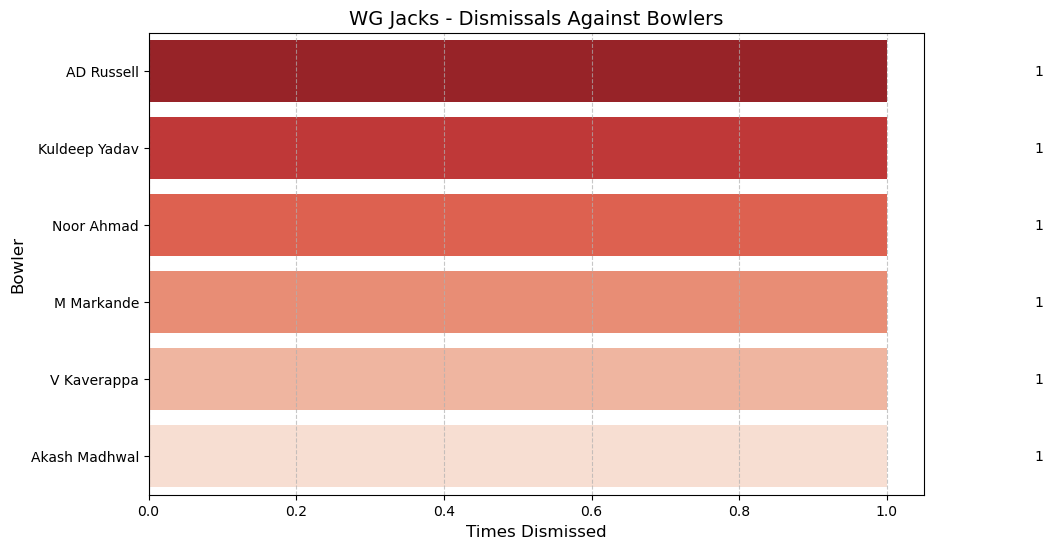

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_batsman_dismissals(stats_df, batsman_name, top_n=10):
    if stats_df.empty or "Times_Dismissed" not in stats_df.columns:
        print(f"No dismissal data available for {batsman_name}.")
        return
    
    # Filter out bowlers with 0 dismissals
    filtered_df = stats_df[stats_df["Times_Dismissed"] > 0]

    if filtered_df.empty:
        print(f"{batsman_name} has not been dismissed by any bowler.")
        return

    # Sort and limit to top N bowlers
    filtered_df = filtered_df.sort_values(by="Times_Dismissed", ascending=False).head(top_n)

    # Plot using Seaborn
    plt.figure(figsize=(10, 6))  # Bigger figure for better clarity
    sns.barplot(x="Times_Dismissed", y="bowler", data=filtered_df, palette="Reds_r")

    # Labels and Title
    plt.xlabel("Times Dismissed", fontsize=12)
    plt.ylabel("Bowler", fontsize=12)
    plt.title(f"{batsman_name} - Dismissals Against Bowlers", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Add Gridlines
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Show values on bars
    for index, value in enumerate(filtered_df["Times_Dismissed"]):
        plt.text(value + 0.2, index, str(value), va="center", fontsize=10)

    plt.show()

# Example Usage
plot_batsman_dismissals(batsman_vs_bowlers_df, batsman_name, top_n=15)  # Show Top 15 Bowlers


In [19]:
import pandas as pd
import numpy as np

def head_to_head_bowlers_vs_batsmen(df, bowlers, batsmen):
    # Filter dataset for selected bowlers vs selected batsmen
    h2h_df = df[(df["bowler"].isin(bowlers)) & (df["batsman"].isin(batsmen))]

    if h2h_df.empty:
        return "No data available for the selected bowlers and batsmen."

    # Group by bowler and batsman
    grouped = h2h_df.groupby(["bowler", "batsman"])

    # Aggregate statistics
    stats_df = grouped.agg(
        Wickets_Taken=("isBowlerWk", "sum"),
        Balls_Bowled=("ball", "count"),
        Runs_Conceded=("runs_of_bat", "sum"),
        
        Dot_Balls=("runs_of_bat", lambda x: (x == 0).sum()),
        Fours_Conceded=("runs_of_bat", lambda x: (x == 4).sum()),
        Sixes_Conceded=("runs_of_bat", lambda x: (x == 6).sum()),
        
        Dismissal_Kinds=("dismissal_kind", lambda x: ", ".join(x.dropna().unique()))
    ).reset_index()

    # Calculate Economy Rate and Dot Ball Percentage
    stats_df["Economy Rate"] = (stats_df["Runs_Conceded"] / stats_df["Balls_Bowled"]) * 6
    stats_df["Dot Ball %"] = (stats_df["Dot_Balls"] / stats_df["Balls_Bowled"]) * 100
    
    # Calculate Strike Rate (SR)
    stats_df["Strike Rate"] = (stats_df["Runs_Conceded"] / stats_df["Balls_Bowled"]) * 100
    
    # Calculate Boundary Percentage
    stats_df["Boundary %"] = ((stats_df["Fours_Conceded"] + stats_df["Sixes_Conceded"]) / stats_df["Balls_Bowled"]) * 100

    # Calculate Batting Average (AVG) - Handling division by zero
    stats_df["AVG"] = np.where(stats_df["Wickets_Taken"] > 0, stats_df["Runs_Conceded"] / stats_df["Wickets_Taken"], stats_df["Runs_Conceded"])

    # Round values for better readability
    stats_df = stats_df.round({"Economy Rate": 2, "Dot Ball %": 2, "Strike Rate": 2, "Boundary %": 2, "AVG": 2})

    # Drop Dot_Balls column as it's no longer needed
    stats_df.drop(columns=["Dot_Balls"], inplace=True)

    return stats_df  # Return DataFrame


In [109]:
from fuzzywuzzy import process
import pandas as pd

def get_closest_matches(names_list, available_names, threshold=80):
    """
    Matches each name in names_list with the closest available name in the dataset.
    
    Parameters:
    names_list (list): List of names to match.
    available_names (list): List of names from the dataset.
    threshold (int): Minimum similarity score to consider a valid match.
    
    Returns:
    list: List of matched names.
    """
    matched_names = []
    for name in names_list:
        match = process.extractOne(name, available_names)
        if match and match[1] >= threshold: 
            matched_names.append(match[0])
        else:
            print(f"⚠ Warning: No good match found for '{name}'")
    return matched_names

# Get unique bowler and batsman names from the dataset
unique_bowlers = df["bowler"].dropna().unique().tolist()
unique_batsmen = df["batsman"].dropna().unique().tolist()

# Input lists
bowlers_list  = [

    "Shahrukh Khan", "Washington Sundar",
    "Rahul Tewatia", "Rashid Khan", "Ravisrinivasan Sai Kishore", "Gerald Coetzee",
    "Mohammed Siraj", "Prasidh Krishna"
]

batsmen_list= [
   
    "RT Sharma", "Jonny Bairstow", "Tilak Varma", "Suryakumar Yadav", "Naman Dhir",
    "HD Pandya", "Raj Angad Bawa", "Mitchell Santner", "T Boult",
    "Jasprit Bumrah", "Richard Gleeson"


]
# Fuzzy match bowler and batsman names with dataset
matched_bowlers = get_closest_matches(bowlers_list, unique_bowlers)
matched_batsmen = get_closest_matches(batsmen_list, unique_batsmen)

# **Ensure we remove any None values (unmatched names)**
matched_bowlers = [b for b in matched_bowlers if b is not None]
matched_batsmen = [b for b in matched_batsmen if b is not None]

# **Run the head-to-head function with cleaned lists**
h2h_bowlers_vs_batsmen_df = head_to_head_bowlers_vs_batsmen(df, matched_bowlers, matched_batsmen)

# **Sort data by Batsman Name first, then by Wickets Taken**
h2h_bowlers_vs_batsmen_df = h2h_bowlers_vs_batsmen_df.sort_values(by=["batsman", "Wickets_Taken"], ascending=[True, False])

# **Reset index for clean display**
h2h_bowlers_vs_batsmen_df.reset_index(drop=True, inplace=True)

# **Display the result**
h2h_bowlers_vs_batsmen_df


⚠ Warning: No good match found for 'Prasidh Krishna'
⚠ Warning: No good match found for 'Raj Angad Bawa'


,bowler,batsman,Wickets_Taken,Balls_Bowled,Runs_Conceded,Fours_Conceded,Sixes_Conceded,Dismissal_Kinds,Economy Rate,Dot Ball %,Strike Rate,Boundary %,AVG
0,Mohammed Siraj,HH Pandya,0,1,1,0,0,,6.00,0.00,100.00,0.00,1.0
1,Mohammed Siraj,JM Bairstow,1,10,14,3,0,caught,8.40,50.00,140.00,30.00,14.0
2,Rashid Khan,JM Bairstow,0,2,2,0,0,,6.00,50.00,100.00,0.00,2.0
3,Mohammed Siraj,MJ Santner,1,3,2,0,0,caught,4.00,33.33,66.67,0.00,2.0
4,Rashid Khan,MJ Santner,1,2,0,0,0,bowled,0.00,100.00,0.00,0.00,0.0
5,R Sai Kishore,RG Sharma,1,6,7,1,0,lbw,7.00,33.33,116.67,16.67,7.0
6,Rashid Khan,RG Sharma,1,11,12,2,0,caught,6.55,54.55,109.09,18.18,12.0
7,Mohammed Siraj,RG Sharma,0,13,8,0,1,,3.69,76.92,61.54,7.69,8.0
8,Washington Sundar,RG Sharma,0,5,13,3,0,,15.60,20.00,260.00,60.00,13.0
9,Mohammed Siraj,SA Yadav,0,7,14,1,1,,12.00,28.57,200.00,28.57,14.0


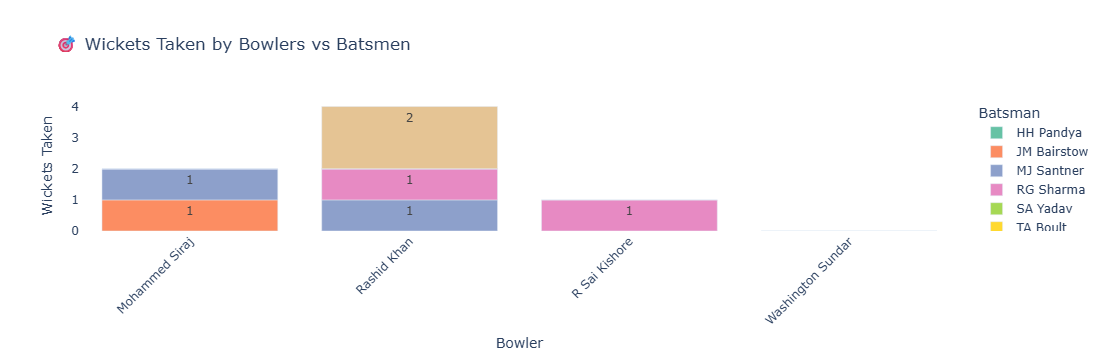

In [112]:
import plotly.express as px

# Create an interactive bar chart
fig = px.bar(
    h2h_bowlers_vs_batsmen_df, 
    x="bowler", 
    y="Wickets_Taken", 
    color="batsman", 
    text="Wickets_Taken",
    labels={"bowler": "Bowler", "Wickets_Taken": "Wickets Taken", "batsman": "Batsman"},
    title="🎯 Wickets Taken by Bowlers vs Batsmen",
    hover_name="batsman",
    hover_data={"bowler": True, "Wickets_Taken": True, "batsman": True},
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Update layout for better readability
fig.update_layout(
    xaxis=dict(title="Bowler", tickangle=-45),
    yaxis=dict(title="Wickets Taken"),
    showlegend=True,
    plot_bgcolor="white"
)

# Show figure
fig.show()



📊 **Batsman vs Bowler Performance Summary (Highlighted Dismissals)**



,Batsman,Bowler,Runs Scored,Balls Faced,Times Dismissed
0,HH Pandya,Mohammed Siraj,1,1,0
1,JM Bairstow,Mohammed Siraj,14,10,1
2,JM Bairstow,Rashid Khan,2,2,0
3,MJ Santner,Mohammed Siraj,2,3,1
4,MJ Santner,Rashid Khan,0,2,1
5,RG Sharma,R Sai Kishore,7,6,1
6,RG Sharma,Rashid Khan,12,11,1
7,RG Sharma,Mohammed Siraj,8,13,0
8,RG Sharma,Washington Sundar,13,5,0
9,SA Yadav,Mohammed Siraj,14,7,0


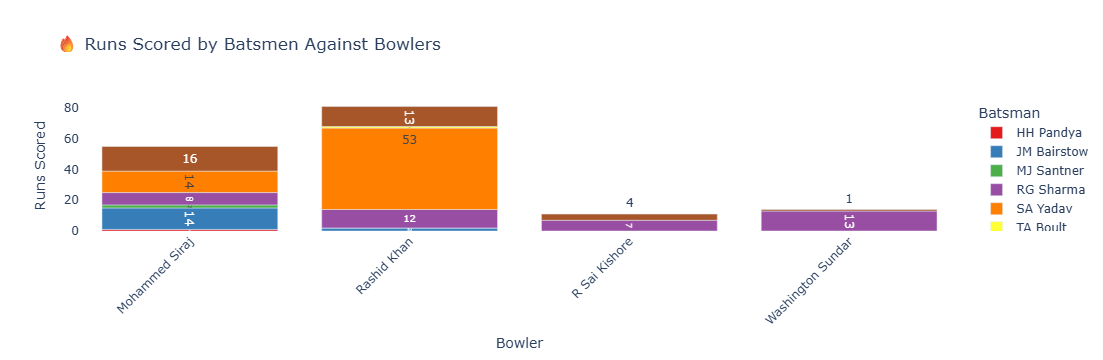

In [114]:
import plotly.express as px
import pandas as pd

# Create the output DataFrame
batsman_vs_bowler_stats = h2h_bowlers_vs_batsmen_df[[
    "batsman", "bowler", "Runs_Conceded", "Balls_Bowled", "Wickets_Taken"
]].rename(columns={
    "batsman": "Batsman",
    "bowler": "Bowler",
    "Runs_Conceded": "Runs Scored",
    "Balls_Bowled": "Balls Faced",
    "Wickets_Taken": "Times Dismissed"
})

# Function to highlight high dismissal count
def highlight_dismissals(s):
    return ['background-color: lightcoral; font-weight: bold;' if v > 2 else '' for v in s]  # Highlight if dismissed > 2 times

# Apply styling to highlight high dismissal counts
styled_df = batsman_vs_bowler_stats.style.apply(highlight_dismissals, subset=["Times Dismissed"])

# Display the highlighted DataFrame
print("\n📊 **Batsman vs Bowler Performance Summary (Highlighted Dismissals)**\n")
display(styled_df)

# Create an interactive bar chart for runs scored
fig = px.bar(
    batsman_vs_bowler_stats, 
    x="Bowler", 
    y="Runs Scored",  
    color="Batsman", 
    text="Runs Scored",
    labels={
        "Bowler": "Bowler", 
        "Runs Scored": "Runs Scored", 
        "Batsman": "Batsman", 
        "Balls Faced": "Balls Faced",
        "Times Dismissed": "Times Dismissed"
    },
    title="🔥 Runs Scored by Batsmen Against Bowlers",
    hover_name="Batsman",
    hover_data={
        "Bowler": True, 
        "Runs Scored": True, 
        "Balls Faced": True, 
        "Times Dismissed": True  
    },
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Update layout for better readability
fig.update_layout(
    xaxis=dict(title="Bowler", tickangle=-45),
    yaxis=dict(title="Runs Scored"),
    showlegend=True,
    plot_bgcolor="white"
)

# Show figure
fig.show()


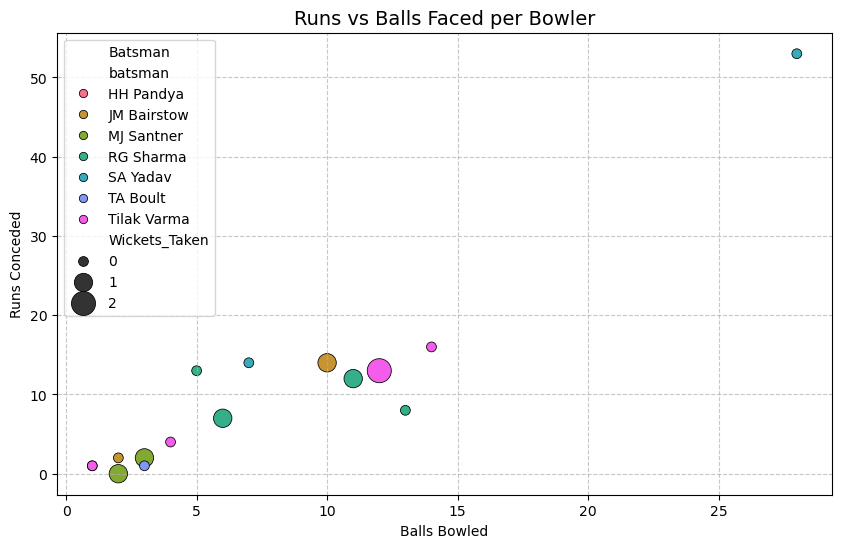

In [116]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=h2h_bowlers_vs_batsmen_df, x="Balls_Bowled", y="Runs_Conceded", hue="batsman", size="Wickets_Taken", sizes=(50, 300), palette="husl", edgecolor="black")

plt.title("Runs vs Balls Faced per Bowler", fontsize=14)
plt.xlabel("Balls Bowled")
plt.ylabel("Runs Conceded")
plt.legend(title="Batsman")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


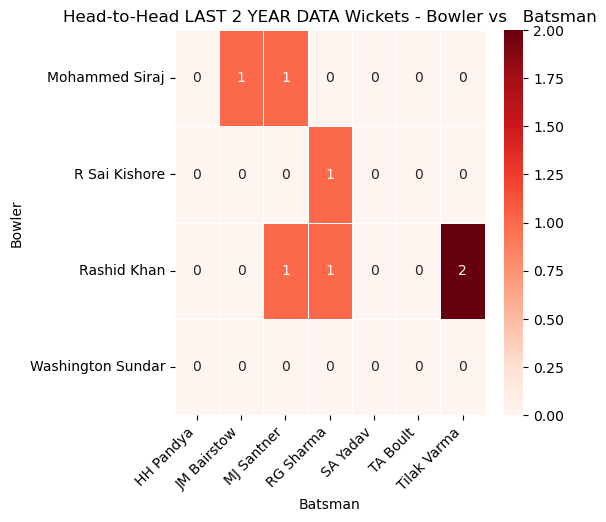

In [118]:
plt.figure(figsize=(5, 5))

# ✅ Fix pivot function syntax
pivot_table = h2h_bowlers_vs_batsmen_df.pivot(index="bowler", columns="batsman", values="Wickets_Taken").fillna(0)

sns.heatmap(pivot_table, cmap="Reds", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Head-to-Head LAST 2 YEAR DATA Wickets - Bowler vs   Batsman", fontsize=12)
plt.xlabel("Batsman")
plt.ylabel("Bowler")
plt.xticks(rotation=45, ha="right")
plt.show()



🎯 **Bowler Performance Analysis** 🎯

🏹 Mohammed Siraj
   - Total Wickets: 2 🎯
   - Strike Rate (SR): 24.0 ⚡
   - Average (AVG): 27.5 📉

🏹 R Sai Kishore
   - Total Wickets: 1 🎯
   - Strike Rate (SR): 10.0 ⚡
   - Average (AVG): 11.0 📉

🏹 Rashid Khan
   - Total Wickets: 4 🎯
   - Strike Rate (SR): 14.5 ⚡
   - Average (AVG): 20.25 📉

🏹 Washington Sundar
   - Total Wickets: 0 🎯
   - Strike Rate (SR): N/A ⚡
   - Average (AVG): N/A 📉

🔥 **Batsman Performance Analysis** 🔥

🧨 HH Pandya
   - Total Runs: 1 🏃
   - Strike Rate (SR): 100.0 ⚡
   - Average (AVG): N/A 📈

🧨 JM Bairstow
   - Total Runs: 16 🏃
   - Strike Rate (SR): 133.33 ⚡
   - Average (AVG): 16.0 📈

🧨 MJ Santner
   - Total Runs: 2 🏃
   - Strike Rate (SR): 40.0 ⚡
   - Average (AVG): 1.0 📈

🧨 RG Sharma
   - Total Runs: 40 🏃
   - Strike Rate (SR): 114.29 ⚡
   - Average (AVG): 20.0 📈

🧨 SA Yadav
   - Total Runs: 67 🏃
   - Strike Rate (SR): 191.43 ⚡
   - Average (AVG): N/A 📈

🧨 TA Boult
   - Total Runs: 1 🏃
   - Strike Rate (SR): 33.33 ⚡
   

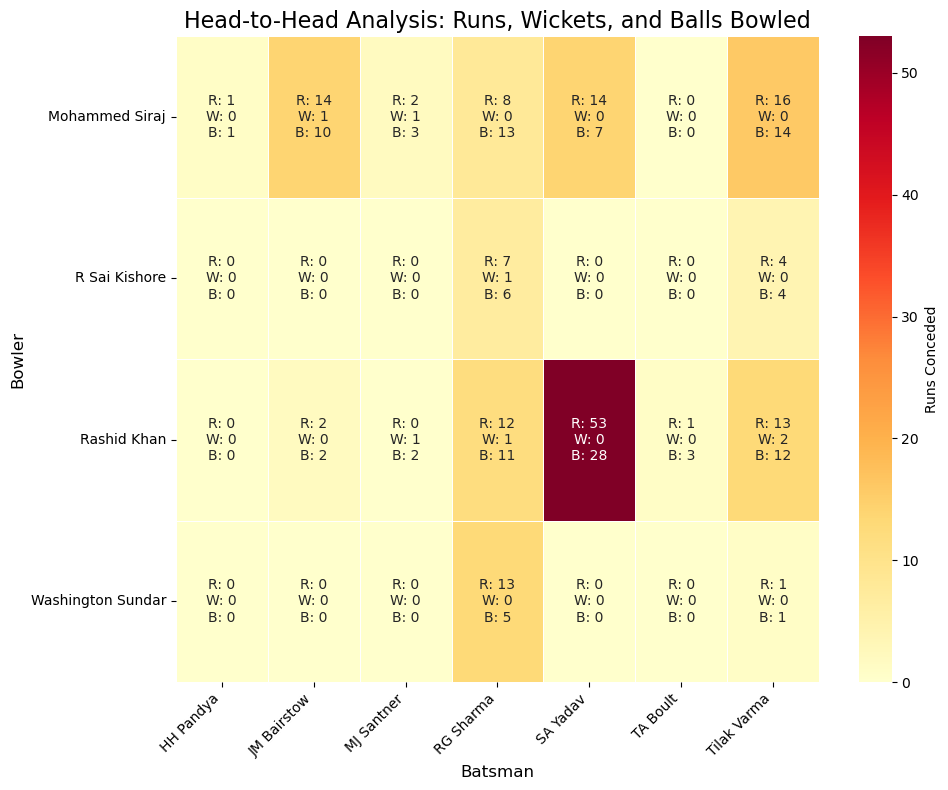

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def combined_heatmap(h2h_df, title="Head-to-Head Analysis: Runs, Wickets, and Balls"):
    try:
        # Calculate bowler statistics
        bowler_stats = h2h_df.groupby('bowler').agg(
            Total_Wickets=('Wickets_Taken', 'sum'),
            Total_Balls=('Balls_Bowled', 'sum'),
            Total_Runs=('Runs_Conceded', 'sum')
        ).reset_index()

        bowler_stats['SR'] = bowler_stats.apply(
            lambda row: round(row['Total_Balls']/row['Total_Wickets'], 2) if row['Total_Wickets'] > 0 else "N/A",
            axis=1
        )
        bowler_stats['AVG'] = bowler_stats.apply(
            lambda row: round(row['Total_Runs']/row['Total_Wickets'], 2) if row['Total_Wickets'] > 0 else "N/A",
            axis=1
        )

        # Print bowler stats
        print("\n🎯 **Bowler Performance Analysis** 🎯")
        for _, row in bowler_stats.iterrows():
            print(f"\n🏹 {row['bowler']}")
            print(f"   - Total Wickets: {row['Total_Wickets']} 🎯")
            print(f"   - Strike Rate (SR): {row['SR']} ⚡")
            print(f"   - Average (AVG): {row['AVG']} 📉")

        # Calculate batsman statistics
        batsman_stats = h2h_df.groupby('batsman').agg(
            Total_Runs=('Runs_Conceded', 'sum'),
            Total_Balls=('Balls_Bowled', 'sum'),
            Dismissals=('Wickets_Taken', 'sum')
        ).reset_index()

        batsman_stats['SR'] = batsman_stats.apply(
            lambda row: round((row['Total_Runs']/row['Total_Balls'])*100, 2) if row['Total_Balls'] > 0 else "N/A",
            axis=1
        )
        batsman_stats['AVG'] = batsman_stats.apply(
            lambda row: round(row['Total_Runs']/row['Dismissals'], 2) if row['Dismissals'] > 0 else "N/A",
            axis=1
        )

        # Print batsman stats
        print("\n🔥 **Batsman Performance Analysis** 🔥")
        for _, row in batsman_stats.iterrows():
            print(f"\n🧨 {row['batsman']}")
            print(f"   - Total Runs: {row['Total_Runs']} 🏃")
            print(f"   - Strike Rate (SR): {row['SR']} ⚡")
            print(f"   - Average (AVG): {row['AVG']} 📈")

        # Create pivot tables for visualization
        runs_pivot = h2h_df.pivot(index='bowler', columns='batsman', values='Runs_Conceded').fillna(0)
        wickets_pivot = h2h_df.pivot(index='bowler', columns='batsman', values='Wickets_Taken').fillna(0)
        balls_pivot = h2h_df.pivot(index='bowler', columns='batsman', values='Balls_Bowled').fillna(0)

        # Create combined annotations
        annotations = (
            "R: " + runs_pivot.astype(int).astype(str) + "\n" +
            "W: " + wickets_pivot.astype(int).astype(str) + "\n" +
            "B: " + balls_pivot.astype(int).astype(str)
        )

        # Generate heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            runs_pivot,
            cmap="YlOrRd",
            annot=annotations,
            fmt="",
            linewidths=0.5,
            cbar_kws={'label': 'Runs Conceded'}
        )
        
        plt.title(title, fontsize=16)
        plt.xlabel("Batsman", fontsize=12)
        plt.ylabel("Bowler", fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error: {str(e)}")

# Usage
combined_heatmap(h2h_bowlers_vs_batsmen_df, title="Head-to-Head Analysis: Runs, Wickets, and Balls Bowled")


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def advanced_heatmap(df, title="Head-to-Head Runs and Wickets"):
    # ⚡ Step 1: Pre-filter relevant columns to reduce memory usage
    df = df[['bowler', 'batsman', 'runs_of_bat', 'isBowlerWk']].copy()
    
    # ⚡ Step 2: Aggregate data efficiently using pivot_table (avoids groupby + pivot combo)
    try:
        # Aggregate runs and wickets in a single pivot operation
        runs_pivot = pd.pivot_table(
            df,
            index='bowler',
            columns='batsman',
            values='runs_of_bat',
            aggfunc='sum',
            fill_value=0
        )
        
        wickets_pivot = pd.pivot_table(
            df,
            index='bowler',
            columns='batsman',
            values='isBowlerWk',
            aggfunc='sum',
            fill_value=0
        )
    except Exception as e:
        print(f"Error during pivot: {str(e)}")
        return

    # ⚡ Step 3: Filter top N batsmen/bowlers to reduce heatmap size
    top_batsmen = df['batsman'].value_counts().head(20).index  # Adjust 20 as needed
    top_bowlers = df['bowler'].value_counts().head(20).index
    runs_pivot = runs_pivot.loc[top_bowlers, top_batsmen]
    wickets_pivot = wickets_pivot.loc[top_bowlers, top_batsmen]

    # ⚡ Step 4: Simplify visualization
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot runs heatmap
    sns.heatmap(
        runs_pivot,
        cmap="Blues",
        annot=True,
        fmt=".0f",
        linewidths=0.5,
        ax=axes[0],
        cbar=False
    )
    axes[0].set_title("Runs Scored (Top 20 Batsmen/Bowlers)")
    
    # Plot wickets heatmap
    sns.heatmap(
        wickets_pivot,
        cmap="Reds",
        annot=True,
        fmt=".0f",
        linewidths=0.5,
        ax=axes[1],
        cbar=False
    )
    axes[1].set_title("Wickets Taken (Top 20 Batsmen/Bowlers)")
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Example usage
#advanced_heatmap(df)


##PLAYER ANALYSIS HEAD TO HEAD 


📊 **WG Jacks - Dismissal Breakdown**

🔹 bowled: M Markande
🔹 caught: Akash Madhwal, AD Russell, Noor Ahmad, V Kaverappa, Kuldeep Yadav
🔹 run out: JD Unadkat


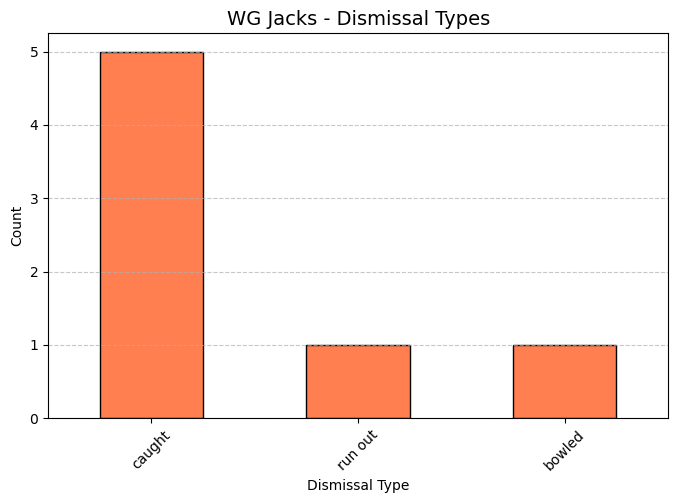

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_batsman_dismissals(df, batsman_name):
    # Check if required columns exist
    required_columns = {"player_dismissed", "dismissal_kind", "bowler"}
    if not required_columns.issubset(df.columns):
        return f"Error: Required columns missing! Available columns: {df.columns.tolist()}"

    # Filter data for the selected batsman
    batsman_df = df[df["player_dismissed"] == batsman_name]

    if batsman_df.empty:
        return f"No dismissal data available for {batsman_name}."

    # Count dismissals by type
    dismissal_counts = batsman_df["dismissal_kind"].value_counts()

    # Group by dismissal type and bowler
    dismissal_breakdown = batsman_df.groupby("dismissal_kind")["bowler"].apply(lambda x: ", ".join(x.unique())).reset_index()
    dismissal_breakdown.columns = ["Dismissal Type", "Bowlers"]

    # Display the structured text output
    print(f"\n📊 **{batsman_name} - Dismissal Breakdown**\n")
    for index, row in dismissal_breakdown.iterrows():
        print(f"🔹 {row['Dismissal Type']}: {row['Bowlers']}")

    # Plot the dismissal type counts
    plt.figure(figsize=(8, 5))
    dismissal_counts.plot(kind="bar", color="coral", edgecolor="black")
    plt.title(f"{batsman_name} - Dismissal Types", fontsize=14)
    plt.xlabel("Dismissal Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    return dismissal_breakdown

# Example usage:
batsman_name = "WG Jacks"
dismissal_data = analyze_batsman_dismissals(df, batsman_name)


**Batsman Head to head with blower Type**


📊 **WG Jacks - Dismissal Breakdown**

🔹 caught: Akash Madhwal (Right-arm Fast-Medium), AD Russell (Medium Fast), Noor Ahmad (Left-arm Chinaman), V Kaverappa (Medium Fast), Kuldeep Yadav (Left-arm Chinaman)
🔹 run out: JD Unadkat (Left-arm Medium)
🔹 bowled: M Markande (Right-arm Leg Spin)


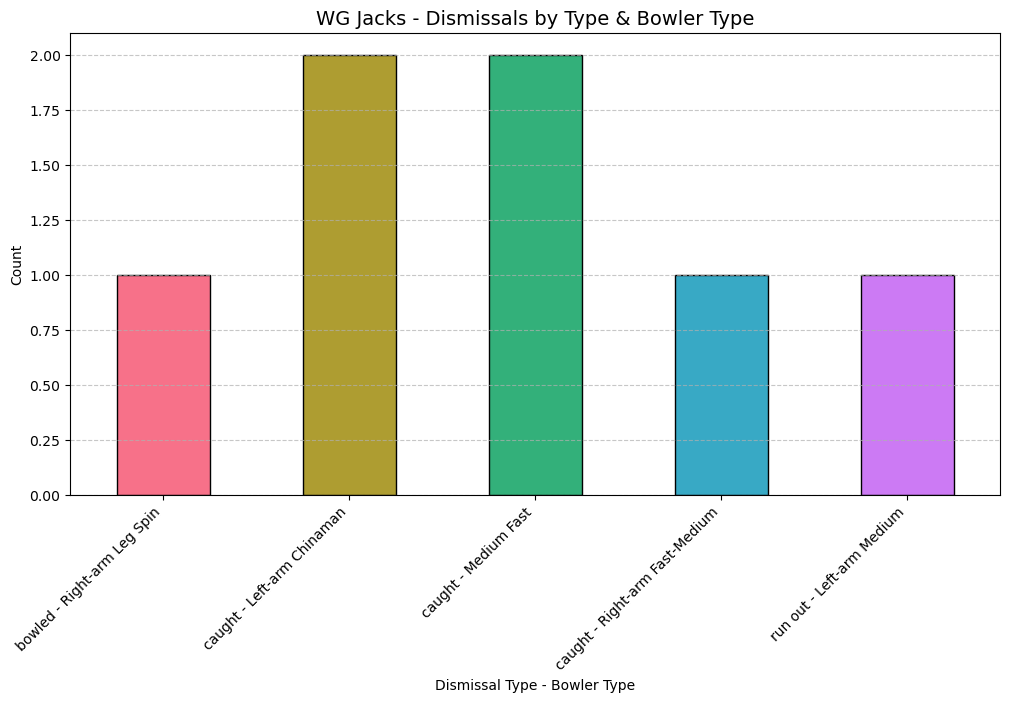

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the provided bowler types dictionary
# Dictionary mapping IPL bowlers to their bowling types
bowler_types = {
    # Fast / Fast-Medium Bowlers (default group)
    "Mohammed Shami": "Right-arm Fast-Medium",
    "AS Joseph": "Right-arm Fast",
    "Yash Dayal": "Left-arm Fast-Medium",
    "TU Deshpande": "Right-arm Medium-Fast",
    "RS Hangargekar": "Right-arm Fast",
    "UT Yadav": "Right-arm Fast",
    "TG Southee": "Right-arm Fast-Medium",
    "SN Thakur": "Right-arm Medium-Fast",
    "Arshdeep Singh": "Left-arm Fast-Medium",
    "KK Ahmed": "Left-arm Fast-Medium",
    "Mukesh Kumar": "Right-arm Medium",
    "C Sakariya": "Left-arm Medium",
    "KR Mayers": "Right-arm Medium",
    "MA Wood": "Right-arm Fast",
    "Avesh Khan": "Right-arm Fast",
    "Mohammed Siraj": "Right-arm Fast",
    "RJW Topley": "Left-arm Fast-Medium",
    "Akash Deep": "Right-arm Medium-Fast",
    "HV Patel": "Right-arm Medium-Fast",
    "JP Behrendorff": "Left-arm Fast-Medium",
    "Yash Thakur": "Right-arm Medium-Fast",
    "A Nortje": "Right-arm Fast",
    "MR Marsh": "Right-arm Medium",
    "LH Ferguson": "Right-arm Fast",
    "WD Parnell": "Left-arm Medium-Fast",
    "RP Meredith": "Right-arm Fast",
    "Mustafizur Rahman": "Left-arm Medium",
    "Akash Singh": "Left-arm Medium",
    "MM Sharma": "Right-arm Fast",
    "K Rabada": "Right-arm Fast",
    "Vijaykumar Vyshak": "Right-arm Medium-Fast",
    "Yudhvir Singh": "Right-arm Medium-Fast",
    "D Jansen": "Left-arm Fast-Medium",
    "M Pathirana": "Right-arm Fast",
    "Naveen-ul-Haq": "Right-arm Fast-Medium",
    "I Sharma": "Right-arm Medium-Fast",
    "K Khejroliya": "Left-arm Medium",
    "Mayank Dagar": "Left-arm Orthodox Spin",
    "J Yadav": "Right-arm Off Spin",
    "D Wiese": "Right-arm Medium",
    "Gurnoor Brar": "Left-arm Fast-Medium",
    "Harshit Rana": "Right-arm Medium-Fast",
    "JR Hazlewood": "Right-arm Fast-Medium",
    "MK Lomror": "Left-arm Orthodox Spin",
    "Akash Madhwal": "Right-arm Fast-Medium",
    "Kartik Tyagi": "Right-arm Fast",
    "R Goyal": "Left-arm Orthodox Spin",
    "T Stubbs": "Right-arm Off Spin",
    "Swapnil Singh": "Left-arm Orthodox Spin",
    "Vivrant Sharma": "Left-arm Orthodox Spin",
    "OC McCoy": "Left-arm Fast-Medium",
    "JE Root": "Right-arm Off Spin",
    "GD Phillips": "Right-arm Off Spin",
    "P Dubey": "Right-arm Leg Spin",
    "Nithish Kumar Reddy": "Right-arm Medium",
    "H Sharma": "Right-arm Fast",
    "PJ Cummins": "Right-arm Fast",
    "MA Starc": "Left-arm Fast",
    "N Burger": "Left-arm Fast",
    "L Wood": "Right-arm Fast-Medium",
    "JJ Bumrah": "Right-arm Fast",
    "SZ Mulani": "Left-arm Orthodox Spin",
    "Naman Dhir": "Right-arm Medium",
    "G Coetzee": "Right-arm Fast",
    "Azmatullah Omarzai": "Right-arm Fast-Medium",
    "SH Johnson": "Left-arm Fast",
    "KT Maphaka": "Left-arm Fast",
    "Rasikh Salam": "Right-arm Fast",
    
    # Spin Bowlers
    "Rashid Khan": "Right-arm Leg Spin",
    "DL Chahar": "Right-arm Off Spin",
    "MJ Santner": "Left-arm Orthodox Spin",
    "RA Jadeja": "Left-arm Orthodox Spin",
    "SP Narine": "Right-arm Off Spin",
    "CV Varun": "Right-arm Mystery Spin",
    "Sikandar Raza": "Right-arm Off Spin",
    "RD Chahar": "Right-arm Leg Spin",
    "Harpreet Brar": "Left-arm Orthodox Spin",
    "AR Patel": "Left-arm Orthodox Spin",
    "Kuldeep Yadav": "Left-arm Chinaman",
    "K Gowtham": "Right-arm Off Spin",
    "Ravi Bishnoi": "Right-arm Leg Spin",
    "Washington Sundar": "Right-arm Off Spin",
    "AU Rashid": "Right-arm Leg Spin",
    "R Ashwin": "Right-arm Off Spin",
    "YS Chahal": "Right-arm Leg Spin",
    "KV Sharma": "Left-arm Orthodox Spin",
    "MG Bracewell": "Right-arm Off Spin",
    "PP Chawla": "Right-arm Leg Spin",
    "HR Shokeen": "Right-arm Off Spin",
    "KH Pandya": "Left-arm Orthodox Spin",
    "MM Ali": "Right-arm Off Spin",
    "Shahbaz Ahmed": "Left-arm Orthodox Spin",
    "A Mishra": "Right-arm Leg Spin",
    "Suyash Sharma": "Right-arm Leg Spin",
    "M Ashwin": "Right-arm Leg Spin",
    "M Markande": "Right-arm Leg Spin",
    "Mohit Rathee": "Right-arm Leg Spin",
    "K Kartikeya": "Left-arm Orthodox Spin",
    "R Sai Kishore": "Left-arm Orthodox Spin",
    "M Theekshana": "Right-arm Mystery Spin",
    "A Zampa": "Right-arm Leg Spin",
    "PWH de Silva": "Left-arm Orthodox Spin",
    "Noor Ahmad": "Left-arm Chinaman",
    "AJ Hosein": "Left-arm Orthodox Spin",
    "Abhishek Sharma": "Left-arm Orthodox Spin",
    "S Gopal": "Right-arm Leg Spin",
    "Simarjeet Singh": "Right-arm Off Spin",
    "VG Arora": "Left-arm Orthodox Spin",
    "K Yadav": "Left-arm Orthodox Spin",
    "MJ Suthar": "Left-arm Orthodox Spin",
    "M Siddharth": "Left-arm Orthodox Spin",
    "MP Yadav": "Right-arm Leg Spin",

    # Medium / All-Rounder types
    "HH Pandya": "Right-arm Medium-Fast",
    "J Little": "Left-arm Medium-Fast",
    "NT Ellis": "Right-arm Medium-Fast",
    "R Dhawan": "Right-arm Medium",
    "JD Unadkat": "Left-arm Medium",
    "SM Curran": "Left-arm Medium-Fast",
    "B Kumar": "Right-arm Medium-Fast",
    "Fazalhaq Farooqi": "Left-arm Medium-Fast",
    "T Natarajan": "Left-arm Medium",
    "JO Holder": "Right-arm Medium-Fast",
    "DJ Willey": "Left-arm Medium-Fast",
    "Shashank Singh": "Right-arm Medium",
    "MW Short": "Right-arm Medium",
    "DJ Hooda": "Right-arm Off Spin",
    "R Shepherd": "Right-arm Medium-Fast",
    "Mohammad Nabi": "Right-arm Off Spin",
    "KA Maharaj": "Left-arm Orthodox Spin",
    "TM Head": "Right-arm Off Spin",
    "CJ Jordan": "Right-arm Medium-Fast",
    "MP Stoinis": "Right-arm Medium",
    "R Tewatia": "Right-arm Leg Spin",
    "R Parag": "Right-arm Off Spin",
    "N Rana": "Right-arm Off Spin",
    "Sandeep Sharma": "Right-arm Medium",
    "Arshad Khan": "Left-arm Medium",
    "Mohsin Khan": "Left-arm Medium-Fast",
    "Arjun Tendulkar": "Left-arm Medium",
    "Navdeep Saini": "Right-arm Fast-Medium",
    "DG Nalkande": "Right-arm Medium-Fast",
    "Ramandeep Singh": "Right-arm Medium",
    "Sumit Kumar": "Right-arm Medium",
    "JA Richardson": "Right-arm Fast-Medium"
}


def analyze_batsman_dismissals(df, batsman_name):
    # Ensure required columns exist
    required_columns = {"player_dismissed", "dismissal_kind", "bowler"}
    if not required_columns.issubset(df.columns):
        return f"Error: Missing columns! Available: {df.columns.tolist()}"

    # Filter data for the selected batsman
    batsman_df = df[df["player_dismissed"] == batsman_name]

    if batsman_df.empty:
        return f"No dismissal data available for {batsman_name}."

    # Map bowler types (default to "Medium Fast" if not found)
    batsman_df["bowler_type"] = batsman_df["bowler"].map(lambda x: bowler_types.get(x, "Medium Fast"))

    # Create a combined dismissal type and bowler type column
    batsman_df["dismissal_bowler_type"] = batsman_df["dismissal_kind"] + " - " + batsman_df["bowler_type"]

    # Count dismissals by dismissal type and bowler type
    dismissal_bowler_type_counts = batsman_df["dismissal_bowler_type"].value_counts().sort_index()

    # Print structured output
    print(f"\n📊 **{batsman_name} - Dismissal Breakdown**\n")
    for dismissal_type in batsman_df["dismissal_kind"].unique():
        subset = batsman_df[batsman_df["dismissal_kind"] == dismissal_type]
        bowler_info = ", ".join(f"{row['bowler']} ({row['bowler_type']})" for _, row in subset.iterrows())
        print(f"🔹 {dismissal_type}: {bowler_info}")

    # Plot bar chart with multiple colors and alphabetical order
    plt.figure(figsize=(12, 6))
    colors = sns.color_palette("husl", len(dismissal_bowler_type_counts))  # Multi-color scheme
    dismissal_bowler_type_counts.sort_index().plot(kind="bar", color=colors, edgecolor="black")

    # Chart Settings
    plt.title(f"{batsman_name} - Dismissals by Type & Bowler Type", fontsize=14)
    plt.xlabel("Dismissal Type - Bowler Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    return dismissal_bowler_type_counts

# Example usage:
batsman_name = "WG Jacks"
dismissal_data = analyze_batsman_dismissals(df, batsman_name)



📊 **WG Jacks - Dismissal Breakdown**

🔹 caught: Akash Madhwal (Right-arm Fast-Medium), AD Russell (Medium Fast), Noor Ahmad (Left-arm Chinaman), V Kaverappa (Medium Fast), Kuldeep Yadav (Left-arm Chinaman)
🔹 run out: JD Unadkat (Left-arm Medium)
🔹 bowled: M Markande (Right-arm Leg Spin)


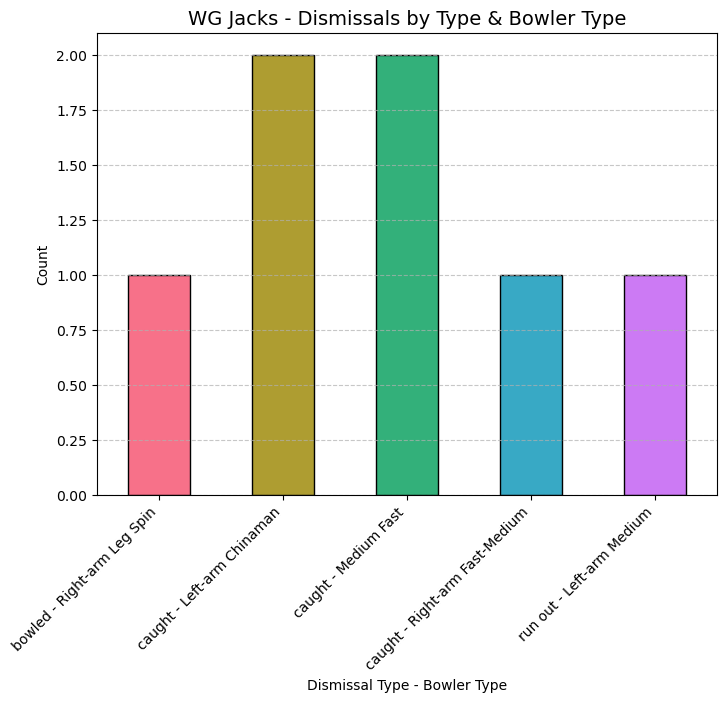

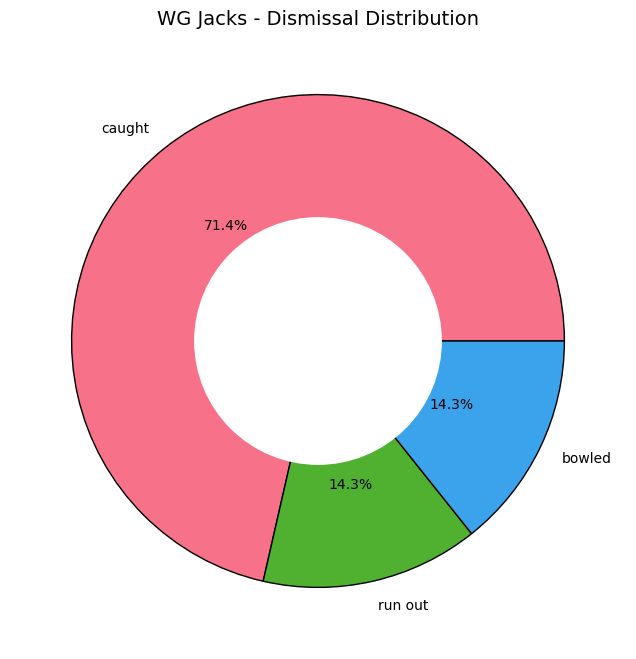

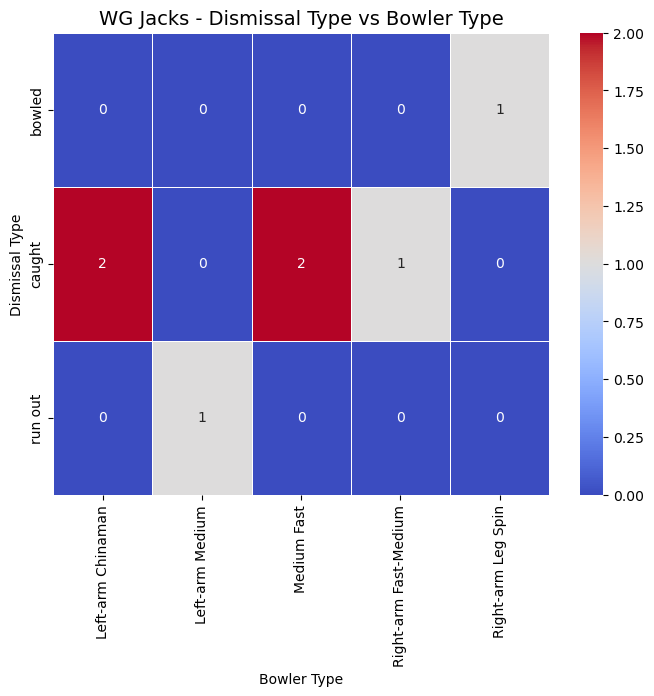

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the provided bowler types dictionary
# Dictionary mapping IPL bowlers to their bowling types
bowler_types = {
    # Fast / Fast-Medium Bowlers (default group)
    "Mohammed Shami": "Right-arm Fast-Medium",
    "AS Joseph": "Right-arm Fast",
    "Yash Dayal": "Left-arm Fast-Medium",
    "TU Deshpande": "Right-arm Medium-Fast",
    "RS Hangargekar": "Right-arm Fast",
    "UT Yadav": "Right-arm Fast",
    "TG Southee": "Right-arm Fast-Medium",
    "SN Thakur": "Right-arm Medium-Fast",
    "Arshdeep Singh": "Left-arm Fast-Medium",
    "KK Ahmed": "Left-arm Fast-Medium",
    "Mukesh Kumar": "Right-arm Medium",
    "C Sakariya": "Left-arm Medium",
    "KR Mayers": "Right-arm Medium",
    "MA Wood": "Right-arm Fast",
    "Avesh Khan": "Right-arm Fast",
    "Mohammed Siraj": "Right-arm Fast",
    "RJW Topley": "Left-arm Fast-Medium",
    "Akash Deep": "Right-arm Medium-Fast",
    "HV Patel": "Right-arm Medium-Fast",
    "JP Behrendorff": "Left-arm Fast-Medium",
    "Yash Thakur": "Right-arm Medium-Fast",
    "A Nortje": "Right-arm Fast",
    "MR Marsh": "Right-arm Medium",
    "LH Ferguson": "Right-arm Fast",
    "WD Parnell": "Left-arm Medium-Fast",
    "RP Meredith": "Right-arm Fast",
    "Mustafizur Rahman": "Left-arm Medium",
    "Akash Singh": "Left-arm Medium",
    "MM Sharma": "Right-arm Fast",
    "K Rabada": "Right-arm Fast",
    "Vijaykumar Vyshak": "Right-arm Medium-Fast",
    "Yudhvir Singh": "Right-arm Medium-Fast",
    "D Jansen": "Left-arm Fast-Medium",
    "M Pathirana": "Right-arm Fast",
    "Naveen-ul-Haq": "Right-arm Fast-Medium",
    "I Sharma": "Right-arm Medium-Fast",
    "K Khejroliya": "Left-arm Medium",
    "Mayank Dagar": "Left-arm Orthodox Spin",
    "J Yadav": "Right-arm Off Spin",
    "D Wiese": "Right-arm Medium",
    "Gurnoor Brar": "Left-arm Fast-Medium",
    "Harshit Rana": "Right-arm Medium-Fast",
    "JR Hazlewood": "Right-arm Fast-Medium",
    "MK Lomror": "Left-arm Orthodox Spin",
    "Akash Madhwal": "Right-arm Fast-Medium",
    "Kartik Tyagi": "Right-arm Fast",
    "R Goyal": "Left-arm Orthodox Spin",
    "T Stubbs": "Right-arm Off Spin",
    "Swapnil Singh": "Left-arm Orthodox Spin",
    "Vivrant Sharma": "Left-arm Orthodox Spin",
    "OC McCoy": "Left-arm Fast-Medium",
    "JE Root": "Right-arm Off Spin",
    "GD Phillips": "Right-arm Off Spin",
    "P Dubey": "Right-arm Leg Spin",
    "Nithish Kumar Reddy": "Right-arm Medium",
    "H Sharma": "Right-arm Fast",
    "PJ Cummins": "Right-arm Fast",
    "MA Starc": "Left-arm Fast",
    "N Burger": "Left-arm Fast",
    "L Wood": "Right-arm Fast-Medium",
    "JJ Bumrah": "Right-arm Fast",
    "SZ Mulani": "Left-arm Orthodox Spin",
    "Naman Dhir": "Right-arm Medium",
    "G Coetzee": "Right-arm Fast",
    "Azmatullah Omarzai": "Right-arm Fast-Medium",
    "SH Johnson": "Left-arm Fast",
    "KT Maphaka": "Left-arm Fast",
    "Rasikh Salam": "Right-arm Fast",
    
    # Spin Bowlers
    "Rashid Khan": "Right-arm Leg Spin",
    "DL Chahar": "Right-arm Off Spin",
    "MJ Santner": "Left-arm Orthodox Spin",
    "RA Jadeja": "Left-arm Orthodox Spin",
    "SP Narine": "Right-arm Off Spin",
    "CV Varun": "Right-arm Mystery Spin",
    "Sikandar Raza": "Right-arm Off Spin",
    "RD Chahar": "Right-arm Leg Spin",
    "Harpreet Brar": "Left-arm Orthodox Spin",
    "AR Patel": "Left-arm Orthodox Spin",
    "Kuldeep Yadav": "Left-arm Chinaman",
    "K Gowtham": "Right-arm Off Spin",
    "Ravi Bishnoi": "Right-arm Leg Spin",
    "Washington Sundar": "Right-arm Off Spin",
    "AU Rashid": "Right-arm Leg Spin",
    "R Ashwin": "Right-arm Off Spin",
    "YS Chahal": "Right-arm Leg Spin",
    "KV Sharma": "Left-arm Orthodox Spin",
    "MG Bracewell": "Right-arm Off Spin",
    "PP Chawla": "Right-arm Leg Spin",
    "HR Shokeen": "Right-arm Off Spin",
    "KH Pandya": "Left-arm Orthodox Spin",
    "MM Ali": "Right-arm Off Spin",
    "Shahbaz Ahmed": "Left-arm Orthodox Spin",
    "A Mishra": "Right-arm Leg Spin",
    "Suyash Sharma": "Right-arm Leg Spin",
    "M Ashwin": "Right-arm Leg Spin",
    "M Markande": "Right-arm Leg Spin",
    "Mohit Rathee": "Right-arm Leg Spin",
    "K Kartikeya": "Left-arm Orthodox Spin",
    "R Sai Kishore": "Left-arm Orthodox Spin",
    "M Theekshana": "Right-arm Mystery Spin",
    "A Zampa": "Right-arm Leg Spin",
    "PWH de Silva": "Left-arm Orthodox Spin",
    "Noor Ahmad": "Left-arm Chinaman",
    "AJ Hosein": "Left-arm Orthodox Spin",
    "Abhishek Sharma": "Left-arm Orthodox Spin",
    "S Gopal": "Right-arm Leg Spin",
    "Simarjeet Singh": "Right-arm Off Spin",
    "VG Arora": "Left-arm Orthodox Spin",
    "K Yadav": "Left-arm Orthodox Spin",
    "MJ Suthar": "Left-arm Orthodox Spin",
    "M Siddharth": "Left-arm Orthodox Spin",
    "MP Yadav": "Right-arm Leg Spin",

    # Medium / All-Rounder types
    "HH Pandya": "Right-arm Medium-Fast",
    "J Little": "Left-arm Medium-Fast",
    "NT Ellis": "Right-arm Medium-Fast",
    "R Dhawan": "Right-arm Medium",
    "JD Unadkat": "Left-arm Medium",
    "SM Curran": "Left-arm Medium-Fast",
    "B Kumar": "Right-arm Medium-Fast",
    "Fazalhaq Farooqi": "Left-arm Medium-Fast",
    "T Natarajan": "Left-arm Medium",
    "JO Holder": "Right-arm Medium-Fast",
    "DJ Willey": "Left-arm Medium-Fast",
    "Shashank Singh": "Right-arm Medium",
    "MW Short": "Right-arm Medium",
    "DJ Hooda": "Right-arm Off Spin",
    "R Shepherd": "Right-arm Medium-Fast",
    "Mohammad Nabi": "Right-arm Off Spin",
    "KA Maharaj": "Left-arm Orthodox Spin",
    "TM Head": "Right-arm Off Spin",
    "CJ Jordan": "Right-arm Medium-Fast",
    "MP Stoinis": "Right-arm Medium",
    "R Tewatia": "Right-arm Leg Spin",
    "R Parag": "Right-arm Off Spin",
    "N Rana": "Right-arm Off Spin",
    "Sandeep Sharma": "Right-arm Medium",
    "Arshad Khan": "Left-arm Medium",
    "Mohsin Khan": "Left-arm Medium-Fast",
    "Arjun Tendulkar": "Left-arm Medium",
    "Navdeep Saini": "Right-arm Fast-Medium",
    "DG Nalkande": "Right-arm Medium-Fast",
    "Ramandeep Singh": "Right-arm Medium",
    "Sumit Kumar": "Right-arm Medium",
    "JA Richardson": "Right-arm Fast-Medium"
}

def analyze_batsman_dismissals(df, batsman_name):
    # Ensure required columns exist
    required_columns = {"player_dismissed", "dismissal_kind", "bowler"}
    if not required_columns.issubset(df.columns):
        return f"Error: Missing columns! Available: {df.columns.tolist()}"

    # Filter data for the selected batsman
    batsman_df = df[df["player_dismissed"] == batsman_name]

    if batsman_df.empty:
        return f"No dismissal data available for {batsman_name}."

    # Map bowler types (default to "Medium Fast" if not found)
    batsman_df["bowler_type"] = batsman_df["bowler"].map(lambda x: bowler_types.get(x, "Medium Fast"))

    # Create a combined dismissal type and bowler type column
    batsman_df["dismissal_bowler_type"] = batsman_df["dismissal_kind"] + " - " + batsman_df["bowler_type"]

    # Count dismissals by dismissal type and bowler type
    dismissal_bowler_type_counts = batsman_df["dismissal_bowler_type"].value_counts().sort_index()

    # Print structured output
    print(f"\n📊 **{batsman_name} - Dismissal Breakdown**\n")
    for dismissal_type in batsman_df["dismissal_kind"].unique():
        subset = batsman_df[batsman_df["dismissal_kind"] == dismissal_type]
        bowler_info = ", ".join(f"{row['bowler']} ({row['bowler_type']})" for _, row in subset.iterrows())
        print(f"🔹 {dismissal_type}: {bowler_info}")

    # **1️⃣ Stacked Bar Chart: Dismissal Type by Bowler Type**
    plt.figure(figsize=(8, 6))
    colors = sns.color_palette("husl", len(dismissal_bowler_type_counts))  # Multi-color scheme
    dismissal_bowler_type_counts.sort_index().plot(kind="bar", color=colors, edgecolor="black")
    plt.title(f"{batsman_name} - Dismissals by Type & Bowler Type", fontsize=14)
    plt.xlabel("Dismissal Type - Bowler Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # **2️⃣ Donut Chart: Dismissal Distribution**
    plt.figure(figsize=(8, 8))
    dismissal_counts = batsman_df["dismissal_kind"].value_counts()
    colors = sns.color_palette("husl", len(dismissal_counts))
    plt.pie(dismissal_counts, labels=dismissal_counts.index, autopct="%1.1f%%", colors=colors, wedgeprops={'edgecolor': 'black'})
    plt.gca().add_artist(plt.Circle((0, 0), 0.5, color='white'))  # Create donut effect
    plt.title(f"{batsman_name} - Dismissal Distribution", fontsize=14)
    plt.show()

    # **3️⃣ Heatmap: How Often Each Bowler Type Dismisses the Batsman**
    heatmap_data = batsman_df.groupby(["dismissal_kind", "bowler_type"]).size().unstack(fill_value=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
    plt.title(f"{batsman_name} - Dismissal Type vs Bowler Type", fontsize=14)
    plt.xlabel("Bowler Type")
    plt.ylabel("Dismissal Type")
    plt.show()

    return dismissal_bowler_type_counts

# Example usage:
batsman_name = "WG Jacks"
dismissal_data = analyze_batsman_dismissals(df, batsman_name)


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the provided bowler types dictionary
# Dictionary mapping IPL bowlers to their bowling types
bowler_types = {
    # Fast / Fast-Medium Bowlers (default group)
    "Mohammed Shami": "Right-arm Fast-Medium",
    "AS Joseph": "Right-arm Fast",
    "Yash Dayal": "Left-arm Fast-Medium",
    "TU Deshpande": "Right-arm Medium-Fast",
    "RS Hangargekar": "Right-arm Fast",
    "UT Yadav": "Right-arm Fast",
    "TG Southee": "Right-arm Fast-Medium",
    "SN Thakur": "Right-arm Medium-Fast",
    "Arshdeep Singh": "Left-arm Fast-Medium",
    "KK Ahmed": "Left-arm Fast-Medium",
    "Mukesh Kumar": "Right-arm Medium",
    "C Sakariya": "Left-arm Medium",
    "KR Mayers": "Right-arm Medium",
    "MA Wood": "Right-arm Fast",
    "Avesh Khan": "Right-arm Fast",
    "Mohammed Siraj": "Right-arm Fast",
    "RJW Topley": "Left-arm Fast-Medium",
    "Akash Deep": "Right-arm Medium-Fast",
    "HV Patel": "Right-arm Medium-Fast",
    "JP Behrendorff": "Left-arm Fast-Medium",
    "Yash Thakur": "Right-arm Medium-Fast",
    "A Nortje": "Right-arm Fast",
    "MR Marsh": "Right-arm Medium",
    "LH Ferguson": "Right-arm Fast",
    "WD Parnell": "Left-arm Medium-Fast",
    "RP Meredith": "Right-arm Fast",
    "Mustafizur Rahman": "Left-arm Medium",
    "Akash Singh": "Left-arm Medium",
    "MM Sharma": "Right-arm Fast",
    "K Rabada": "Right-arm Fast",
    "Vijaykumar Vyshak": "Right-arm Medium-Fast",
    "Yudhvir Singh": "Right-arm Medium-Fast",
    "D Jansen": "Left-arm Fast-Medium",
    "M Pathirana": "Right-arm Fast",
    "Naveen-ul-Haq": "Right-arm Fast-Medium",
    "I Sharma": "Right-arm Medium-Fast",
    "K Khejroliya": "Left-arm Medium",
    "Mayank Dagar": "Left-arm Orthodox Spin",
    "J Yadav": "Right-arm Off Spin",
    "D Wiese": "Right-arm Medium",
    "Gurnoor Brar": "Left-arm Fast-Medium",
    "Harshit Rana": "Right-arm Medium-Fast",
    "JR Hazlewood": "Right-arm Fast-Medium",
    "MK Lomror": "Left-arm Orthodox Spin",
    "Akash Madhwal": "Right-arm Fast-Medium",
    "Kartik Tyagi": "Right-arm Fast",
    "R Goyal": "Left-arm Orthodox Spin",
    "T Stubbs": "Right-arm Off Spin",
    "Swapnil Singh": "Left-arm Orthodox Spin",
    "Vivrant Sharma": "Left-arm Orthodox Spin",
    "OC McCoy": "Left-arm Fast-Medium",
    "JE Root": "Right-arm Off Spin",
    "GD Phillips": "Right-arm Off Spin",
    "P Dubey": "Right-arm Leg Spin",
    "Nithish Kumar Reddy": "Right-arm Medium",
    "H Sharma": "Right-arm Fast",
    "PJ Cummins": "Right-arm Fast",
    "MA Starc": "Left-arm Fast",
    "N Burger": "Left-arm Fast",
    "L Wood": "Right-arm Fast-Medium",
    "JJ Bumrah": "Right-arm Fast",
    "SZ Mulani": "Left-arm Orthodox Spin",
    "Naman Dhir": "Right-arm Medium",
    "G Coetzee": "Right-arm Fast",
    "Azmatullah Omarzai": "Right-arm Fast-Medium",
    "SH Johnson": "Left-arm Fast",
    "KT Maphaka": "Left-arm Fast",
    "Rasikh Salam": "Right-arm Fast",
    
    # Spin Bowlers
    "Rashid Khan": "Right-arm Leg Spin",
    "DL Chahar": "Right-arm Off Spin",
    "MJ Santner": "Left-arm Orthodox Spin",
    "RA Jadeja": "Left-arm Orthodox Spin",
    "SP Narine": "Right-arm Off Spin",
    "CV Varun": "Right-arm Mystery Spin",
    "Sikandar Raza": "Right-arm Off Spin",
    "RD Chahar": "Right-arm Leg Spin",
    "Harpreet Brar": "Left-arm Orthodox Spin",
    "AR Patel": "Left-arm Orthodox Spin",
    "Kuldeep Yadav": "Left-arm Chinaman",
    "K Gowtham": "Right-arm Off Spin",
    "Ravi Bishnoi": "Right-arm Leg Spin",
    "Washington Sundar": "Right-arm Off Spin",
    "AU Rashid": "Right-arm Leg Spin",
    "R Ashwin": "Right-arm Off Spin",
    "YS Chahal": "Right-arm Leg Spin",
    "KV Sharma": "Left-arm Orthodox Spin",
    "MG Bracewell": "Right-arm Off Spin",
    "PP Chawla": "Right-arm Leg Spin",
    "HR Shokeen": "Right-arm Off Spin",
    "KH Pandya": "Left-arm Orthodox Spin",
    "MM Ali": "Right-arm Off Spin",
    "Shahbaz Ahmed": "Left-arm Orthodox Spin",
    "A Mishra": "Right-arm Leg Spin",
    "Suyash Sharma": "Right-arm Leg Spin",
    "M Ashwin": "Right-arm Leg Spin",
    "M Markande": "Right-arm Leg Spin",
    "Mohit Rathee": "Right-arm Leg Spin",
    "K Kartikeya": "Left-arm Orthodox Spin",
    "R Sai Kishore": "Left-arm Orthodox Spin",
    "M Theekshana": "Right-arm Mystery Spin",
    "A Zampa": "Right-arm Leg Spin",
    "PWH de Silva": "Left-arm Orthodox Spin",
    "Noor Ahmad": "Left-arm Chinaman",
    "AJ Hosein": "Left-arm Orthodox Spin",
    "Abhishek Sharma": "Left-arm Orthodox Spin",
    "S Gopal": "Right-arm Leg Spin",
    "Simarjeet Singh": "Right-arm Off Spin",
    "VG Arora": "Left-arm Orthodox Spin",
    "K Yadav": "Left-arm Orthodox Spin",
    "MJ Suthar": "Left-arm Orthodox Spin",
    "M Siddharth": "Left-arm Orthodox Spin",
    "MP Yadav": "Right-arm Leg Spin",

    # Medium / All-Rounder types
    "HH Pandya": "Right-arm Medium-Fast",
    "J Little": "Left-arm Medium-Fast",
    "NT Ellis": "Right-arm Medium-Fast",
    "R Dhawan": "Right-arm Medium",
    "JD Unadkat": "Left-arm Medium",
    "SM Curran": "Left-arm Medium-Fast",
    "B Kumar": "Right-arm Medium-Fast",
    "Fazalhaq Farooqi": "Left-arm Medium-Fast",
    "T Natarajan": "Left-arm Medium",
    "JO Holder": "Right-arm Medium-Fast",
    "DJ Willey": "Left-arm Medium-Fast",
    "Shashank Singh": "Right-arm Medium",
    "MW Short": "Right-arm Medium",
    "DJ Hooda": "Right-arm Off Spin",
    "R Shepherd": "Right-arm Medium-Fast",
    "Mohammad Nabi": "Right-arm Off Spin",
    "KA Maharaj": "Left-arm Orthodox Spin",
    "TM Head": "Right-arm Off Spin",
    "CJ Jordan": "Right-arm Medium-Fast",
    "MP Stoinis": "Right-arm Medium",
    "R Tewatia": "Right-arm Leg Spin",
    "R Parag": "Right-arm Off Spin",
    "N Rana": "Right-arm Off Spin",
    "Sandeep Sharma": "Right-arm Medium",
    "Arshad Khan": "Left-arm Medium",
    "Mohsin Khan": "Left-arm Medium-Fast",
    "Arjun Tendulkar": "Left-arm Medium",
    "Navdeep Saini": "Right-arm Fast-Medium",
    "DG Nalkande": "Right-arm Medium-Fast",
    "Ramandeep Singh": "Right-arm Medium",
    "Sumit Kumar": "Right-arm Medium",
    "JA Richardson": "Right-arm Fast-Medium"
}


def analyze_batsman_vs_bowlers(df, batsman_name, inning=None):
    """Analyzes a batsman's performance against different bowlers, including strike rate, average, and dismissal types."""

    # **Step 1: Filter dataset for selected batsman**
    batsman_df = df[df["batsman"] == batsman_name]

    # **Step 2: Apply innings filter (if specified)**
    if inning is not None:
        batsman_df = batsman_df[batsman_df["inning"] == inning]

    if batsman_df.empty:
        return f"No data available for {batsman_name} in inning {inning}." if inning else f"No data available for {batsman_name}."

    # **Step 3: Group by bowler and calculate key statistics**
    stats_df = batsman_df.groupby("bowler").agg(
        Times_Dismissed=("player_dismissed", lambda x: (x == batsman_name).sum()),
        Runs=("runs_of_bat", "sum"),
        Balls=("ball", "count"),
        Fours=("runs_of_bat", lambda x: (x == 4).sum()),
        Sixes=("runs_of_bat", lambda x: (x == 6).sum()),
        Dismissal_Kinds=("dismissal_kind", lambda x: ", ".join(x.dropna().unique()))  
    ).reset_index()

    # **Step 4: Calculate additional performance metrics**
    stats_df["SR"] = (stats_df["Runs"] / stats_df["Balls"]) * 100  
    stats_df["AVG"] = stats_df.apply(lambda row: row["Runs"] if row["Times_Dismissed"] == 0 else row["Runs"] / row["Times_Dismissed"], axis=1)
    stats_df["Boundary%"] = ((stats_df["Fours"] + stats_df["Sixes"]) / stats_df["Balls"]) * 100  

    # **Step 5: Add Bowler Type**
    stats_df["Bowler Type"] = stats_df["bowler"].map(lambda x: bowler_types.get(x, "Medium Fast"))

    # **Step 6: Sort by most dismissals**
    stats_df = stats_df.sort_values(by="Times_Dismissed", ascending=False).reset_index(drop=True)

    return stats_df


In [33]:
# ✅ Run this cell first to ensure 'bowler_type' exists in df
df["bowler_type"] = df["bowler"].map(lambda x: bowler_types.get(x, "Medium Fast"))


In [34]:
# **Example Usage**
batsman_name = "WG Jacks"  # Change to any player
inning = None  # Set to 1 or 2 to filter by innings, or None for all innings

In [35]:
# Call function separately
batsman_vs_bowlers_df = analyze_batsman_vs_bowlers(df, batsman_name, inning)

# Print DataFrame result
batsman_vs_bowlers_df

,bowler,Times_Dismissed,Runs,Balls,Fours,Sixes,Dismissal_Kinds,SR,AVG,Boundary%,Bowler Type
0,AD Russell,1,0,1,0,0,caught,0.000000,0.0,0.000000,Medium Fast
1,Kuldeep Yadav,1,14,6,0,2,caught,233.333333,14.0,33.333333,Left-arm Chinaman
2,Noor Ahmad,1,17,14,1,1,caught,121.428571,17.0,14.285714,Left-arm Chinaman
3,M Markande,1,4,5,0,0,bowled,80.000000,4.0,0.000000,Right-arm Leg Spin
4,V Kaverappa,1,1,3,0,0,caught,33.333333,1.0,0.000000,Medium Fast
5,Akash Madhwal,1,4,3,1,0,caught,133.333333,4.0,33.333333,Right-arm Fast-Medium
6,R Sai Kishore,0,10,5,0,1,,200.000000,10.0,20.000000,Left-arm Orthodox Spin
7,T Natarajan,0,3,3,0,0,,100.000000,3.0,0.000000,Left-arm Medium
8,Suyash Sharma,0,2,3,0,0,,66.666667,2.0,0.000000,Right-arm Leg Spin
9,Shahbaz Ahmed,0,1,3,0,0,,33.333333,1.0,0.000000,Left-arm Orthodox Spin


In [36]:
import plotly.express as px

fig = px.scatter(
    batsman_vs_bowlers_df, 
    x="Balls", 
    y="Runs", 
    color="Bowler Type", 
    size="Times_Dismissed",  
    hover_data=["bowler", "SR", "AVG", "Boundary%"],  
    title=f"{batsman_name} - Runs vs Balls Faced per Bowler",
    labels={"Balls": "Balls Faced", "Runs": "Runs Scored"},
    template="plotly_dark"  
)
fig.show()


<Figure size 1000x600 with 0 Axes>

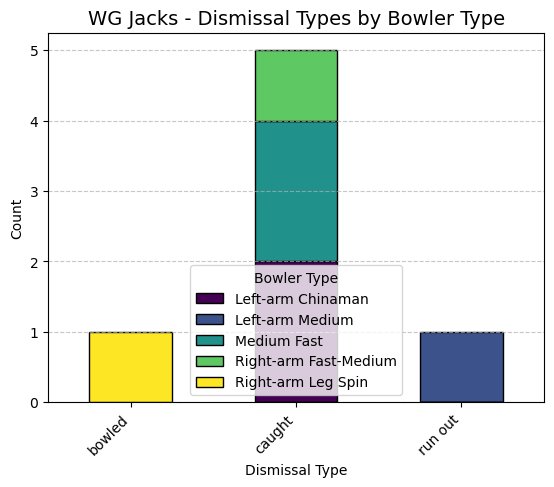

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Ensure 'bowler_type' exists in df before plotting
if "bowler_type" not in df.columns:
    df["bowler_type"] = df["bowler"].map(lambda x: bowler_types.get(x, "Medium Fast"))

# ✅ Group dismissals by type and bowler type
dismissal_bowler_type_counts = df[df["player_dismissed"] == batsman_name] \
    .groupby(["dismissal_kind", "bowler_type"]) \
    .size().unstack(fill_value=0)

# ✅ Plot Stacked Bar Chart
plt.figure(figsize=(10, 6))
dismissal_bowler_type_counts.plot(kind="bar", stacked=True, colormap="viridis", edgecolor="black")

plt.title(f"{batsman_name} - Dismissal Types by Bowler Type", fontsize=14)
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Bowler Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


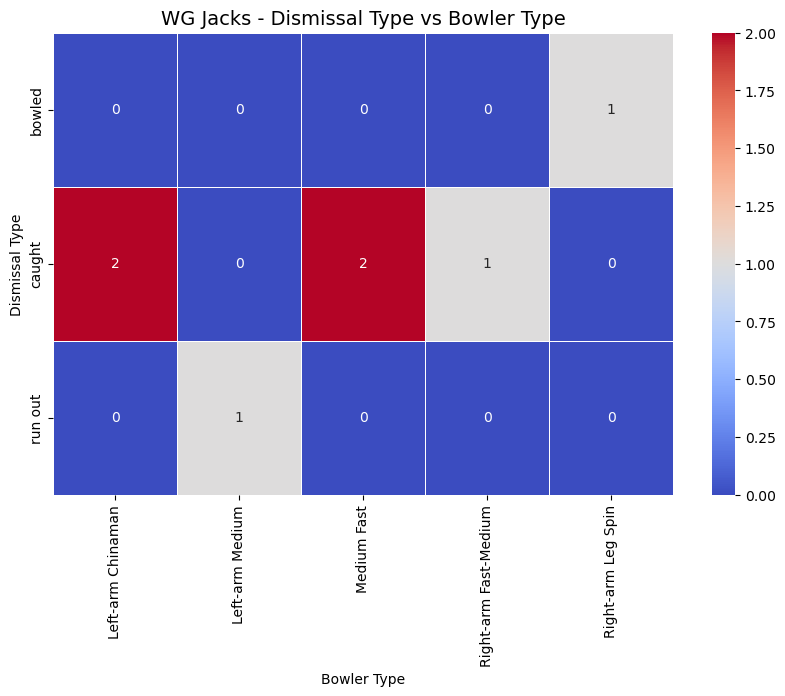

In [38]:
import seaborn as sns

# ✅ Ensure 'bowler_type' exists in df
if "bowler_type" not in df.columns:
    df["bowler_type"] = df["bowler"].map(lambda x: bowler_types.get(x, "Medium Fast"))

# ✅ Now generate the plot
heatmap_data = df[df["player_dismissed"] == batsman_name].groupby(["dismissal_kind", "bowler_type"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)

plt.title(f"{batsman_name} - Dismissal Type vs Bowler Type", fontsize=14)
plt.xlabel("Bowler Type")
plt.ylabel("Dismissal Type")
plt.show()



📊 **WG Jacks - Dismissal Breakdown**

🔹 caught: 71.43% (117.0 runs scored before dismissal)
🔹 run out: 14.29% (7.0 runs scored before dismissal)
🔹 bowled: 14.29% (6.0 runs scored before dismissal)


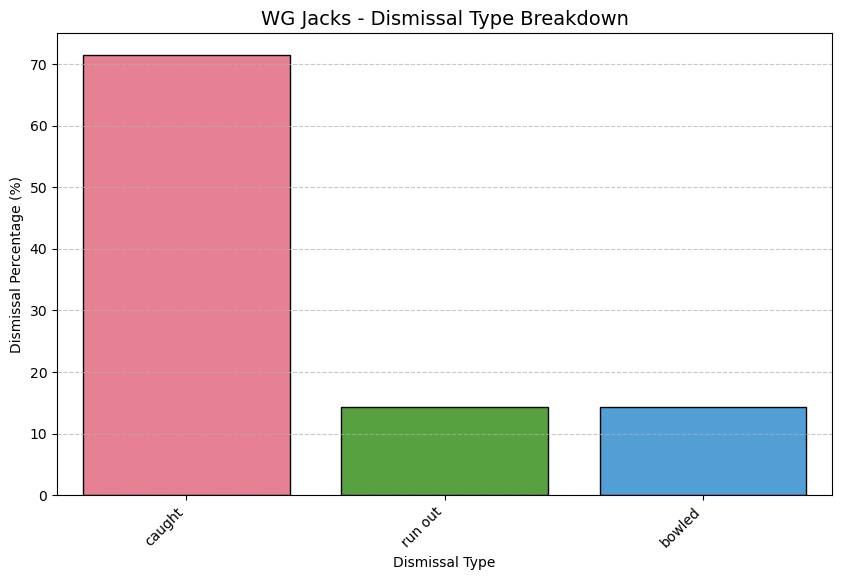

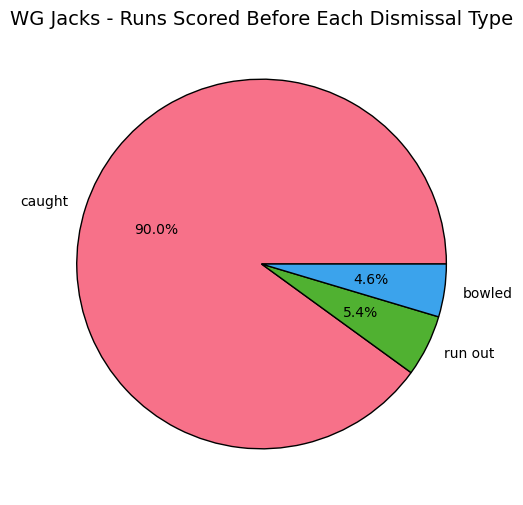

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_dismissal_contributions(df, batsman_name):
    # ✅ Filter data for the selected batsman
    batsman_dismissals = df[df["player_dismissed"] == batsman_name]

    if batsman_dismissals.empty:
        return f"No dismissal data available for {batsman_name}."

    # ✅ Initialize a dictionary to store runs before each dismissal type
    runs_before_dismissal = {}

    # ✅ Calculate runs before each dismissal type
    for _, row in batsman_dismissals.iterrows():
        match_id = row["match_id"]
        dismissal_type = row["dismissal_kind"]

        # ✅ Filter all balls played by batsman in that match **before dismissal**
        runs_scored = df[(df["batsman"] == batsman_name) & (df["match_id"] == match_id)]["runs_of_bat"].sum()

        # ✅ Store runs against each dismissal type
        if dismissal_type in runs_before_dismissal:
            runs_before_dismissal[dismissal_type] += runs_scored
        else:
            runs_before_dismissal[dismissal_type] = runs_scored

    # ✅ Convert to DataFrame
    dismissal_counts = batsman_dismissals["dismissal_kind"].value_counts(normalize=True) * 100
    runs_per_dismissal = pd.Series(runs_before_dismissal)

    # ✅ Merge both dataframes
    dismissal_summary = pd.DataFrame({
        "Dismissal %": dismissal_counts.round(2),
        "Total Runs Scored": runs_per_dismissal
    }).fillna(0)  # Fill NaN if no runs recorded

    # ✅ Sort by highest dismissal %
    dismissal_summary = dismissal_summary.sort_values(by="Dismissal %", ascending=False)

    # 🔹 Print structured output
    print(f"\n📊 **{batsman_name} - Dismissal Breakdown**\n")
    for dismissal, row in dismissal_summary.iterrows():
        print(f"🔹 {dismissal}: {row['Dismissal %']}% ({row['Total Runs Scored']} runs scored before dismissal)")

    # ✅ **1️⃣ Bar Chart - Dismissal Type Breakdown**
    plt.figure(figsize=(10, 6))
    sns.barplot(x=dismissal_summary.index, y=dismissal_summary["Dismissal %"], palette="husl", edgecolor="black")
    plt.title(f"{batsman_name} - Dismissal Type Breakdown", fontsize=14)
    plt.xlabel("Dismissal Type")
    plt.ylabel("Dismissal Percentage (%)")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # ✅ **2️⃣ Pie Chart - Runs Scored Before Each Dismissal**
    if dismissal_summary["Total Runs Scored"].sum() > 0:
        plt.figure(figsize=(8, 6))
        plt.pie(dismissal_summary["Total Runs Scored"], labels=dismissal_summary.index, autopct="%1.1f%%",
                colors=sns.color_palette("husl", len(dismissal_summary)), wedgeprops={'edgecolor': 'black'})
        plt.title(f"{batsman_name} - Runs Scored Before Each Dismissal Type", fontsize=14)
        plt.show()
    else:
        print(f"⚠ No runs recorded before dismissal for {batsman_name}.")

    return dismissal_summary

# **Example Usage**
batsman_name = "WG Jacks"  # Change to any player
dismissal_data = analyze_dismissal_contributions(df, batsman_name)



🔍 Analyzing dismissals for V Kohli...


📊 **V Kohli - Dismissals by Bowler Type**

🔹 Medium Fast: 4.0 dismissals, 110.0 runs, 92.0 balls, AVG: 27.5, SR: 119.57
🔹 Right-arm Leg Spin: 4.0 dismissals, 139.0 runs, 119.0 balls, AVG: 34.75, SR: 116.81
🔹 Right-arm Medium-Fast: 4.0 dismissals, 177.0 runs, 108.0 balls, AVG: 44.25, SR: 163.89
🔹 Left-arm Medium: 3.0 dismissals, 93.0 runs, 57.0 balls, AVG: 31.0, SR: 163.16
🔹 Left-arm Orthodox Spin: 3.0 dismissals, 182.0 runs, 150.0 balls, AVG: 60.67, SR: 121.33
🔹 Left-arm Fast-Medium: 2.0 dismissals, 111.0 runs, 64.0 balls, AVG: 55.5, SR: 173.44
🔹 Left-arm Chinaman: 1.0 dismissals, 79.0 runs, 56.0 balls, AVG: 79.0, SR: 141.07
🔹 Right-arm Fast: 1.0 dismissals, 169.0 runs, 92.0 balls, AVG: 169.0, SR: 183.7
🔹 Right-arm Medium: 1.0 dismissals, 61.0 runs, 42.0 balls, AVG: 61.0, SR: 145.24
🔹 Right-arm Off Spin: 1.0 dismissals, 70.0 runs, 62.0 balls, AVG: 70.0, SR: 112.9
🔹 Left-arm Fast: 0.0 dismissals, 59.0 runs, 37.0 balls, AVG: 59.0, SR: 159.46
🔹 Lef

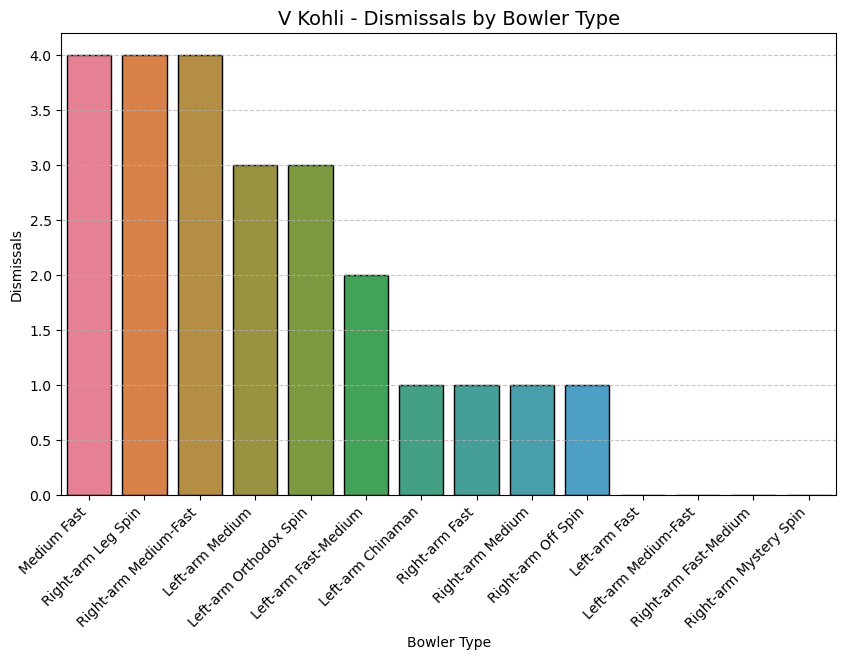

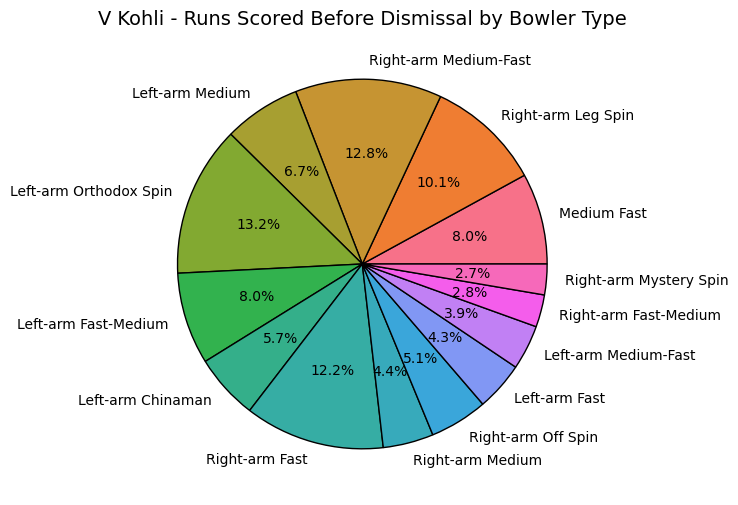


🔍 Analyzing dismissals for RG Sharma...


📊 **RG Sharma - Dismissals by Bowler Type**

🔹 Left-arm Orthodox Spin: 4.0 dismissals, 108.0 runs, 97.0 balls, AVG: 27.0, SR: 111.34
🔹 Medium Fast: 4.0 dismissals, 93.0 runs, 60.0 balls, AVG: 23.25, SR: 155.0
🔹 Right-arm Leg Spin: 4.0 dismissals, 50.0 runs, 33.0 balls, AVG: 12.5, SR: 151.52
🔹 Right-arm Medium-Fast: 3.0 dismissals, 134.0 runs, 106.0 balls, AVG: 44.67, SR: 126.42
🔹 Left-arm Medium: 2.0 dismissals, 63.0 runs, 39.0 balls, AVG: 31.5, SR: 161.54
🔹 Left-arm Medium-Fast: 2.0 dismissals, 41.0 runs, 21.0 balls, AVG: 20.5, SR: 195.24
🔹 Right-arm Fast: 2.0 dismissals, 101.0 runs, 71.0 balls, AVG: 50.5, SR: 142.25
🔹 Right-arm Fast-Medium: 2.0 dismissals, 48.0 runs, 34.0 balls, AVG: 24.0, SR: 141.18
🔹 Right-arm Medium: 2.0 dismissals, 23.0 runs, 21.0 balls, AVG: 11.5, SR: 109.52
🔹 Right-arm Off Spin: 2.0 dismissals, 28.0 runs, 20.0 balls, AVG: 14.0, SR: 140.0
🔹 Left-arm Fast-Medium: 1.0 dismissals, 27.0 runs, 22.0 balls, AVG: 27.0, SR: 122.

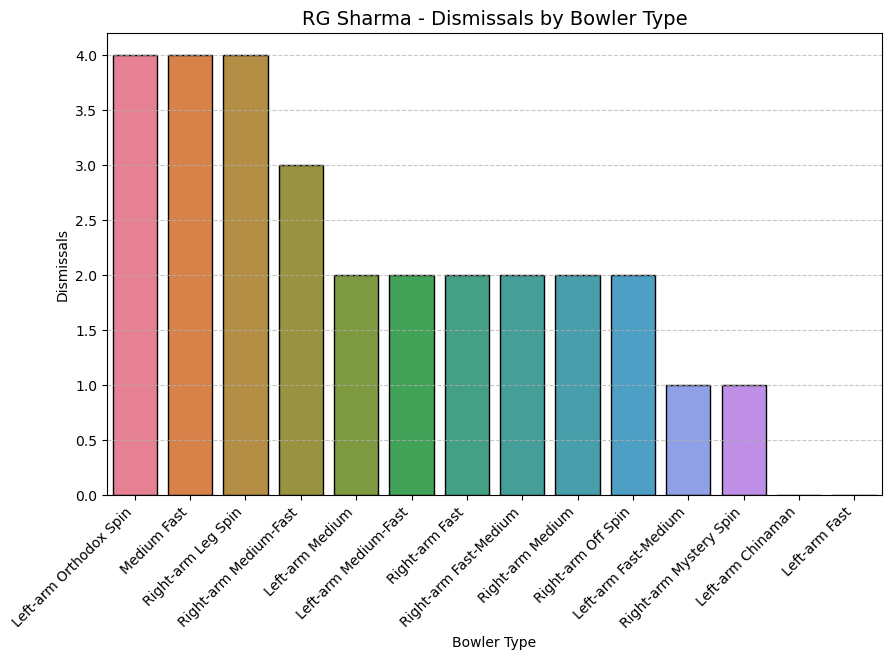

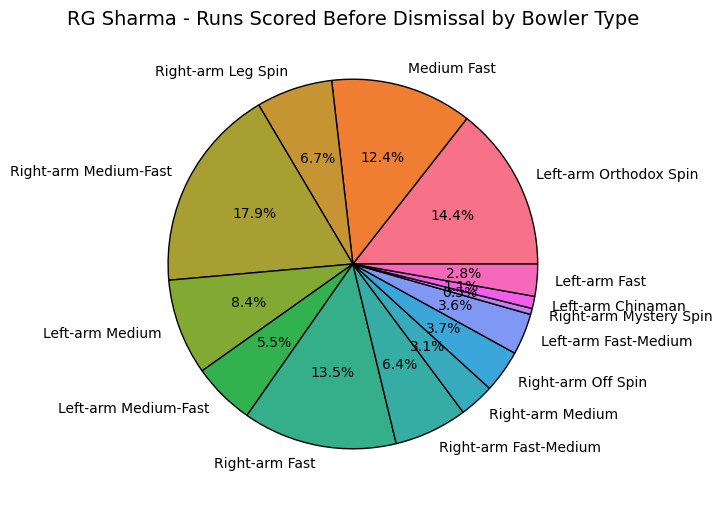

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_dismissals_by_bowler_type(df, batsman_names, bowler_types):
    # Loop through each batsman name in the list
    for batsman_name in batsman_names:
        print(f"\n🔍 Analyzing dismissals for {batsman_name}...\n")
        
        # ✅ Filter dismissals of the selected batsman
        batsman_dismissals = df[df["player_dismissed"] == batsman_name]

        if batsman_dismissals.empty:
            print(f"⚠ No dismissal data available for {batsman_name}.")
            continue  # Skip to the next batsman

        # ✅ Map bowler types to dismissals (default to "Medium Fast" if unknown)
        df["bowler_type"] = df["bowler"].map(lambda x: bowler_types.get(x, "Medium Fast"))

        # ✅ Group data by bowler type
        grouped = df[df["batsman"] == batsman_name].groupby("bowler_type")

        # ✅ Calculate stats per bowler type
        dismissal_counts = batsman_dismissals["bowler_type"].value_counts()
        runs_by_bowler_type = grouped["runs_of_bat"].sum()
        balls_by_bowler_type = grouped["ball"].count()

        # ✅ Calculate AVG and SR
        avg_by_bowler_type = runs_by_bowler_type / dismissal_counts
        sr_by_bowler_type = (runs_by_bowler_type / balls_by_bowler_type) * 100

        # ✅ Combine all stats into a DataFrame
        dismissal_summary = pd.DataFrame({
            "Dismissals": dismissal_counts,
            "Total Runs Scored": runs_by_bowler_type,
            "Balls Faced": balls_by_bowler_type,
            "AVG": avg_by_bowler_type.fillna(runs_by_bowler_type),  # If not dismissed, AVG = Runs
            "SR": sr_by_bowler_type.fillna(0)  # If no balls faced, SR = 0
        }).fillna(0)  # Fill NaN values

        # ✅ Sort by highest dismissals
        dismissal_summary = dismissal_summary.sort_values(by="Dismissals", ascending=False)

        # 🔹 Print structured output for each player
        print(f"\n📊 **{batsman_name} - Dismissals by Bowler Type**\n")
        for bowler_type, row in dismissal_summary.iterrows():
            print(f"🔹 {bowler_type}: {row['Dismissals']} dismissals, {row['Total Runs Scored']} runs, {row['Balls Faced']} balls, "
                  f"AVG: {round(row['AVG'], 2)}, SR: {round(row['SR'], 2)}")

        # ✅ **1️⃣ Bar Chart - Dismissals by Bowler Type**
        plt.figure(figsize=(10, 6))
        sns.barplot(x=dismissal_summary.index, y=dismissal_summary["Dismissals"], palette="husl", edgecolor="black")
        plt.title(f"{batsman_name} - Dismissals by Bowler Type", fontsize=14)
        plt.xlabel("Bowler Type")
        plt.ylabel("Dismissals")
        plt.xticks(rotation=45, ha="right")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()

        # ✅ **2️⃣ Pie Chart - Runs Scored Before Dismissal by Bowler Type**
        if dismissal_summary["Total Runs Scored"].sum() > 0:
            plt.figure(figsize=(8, 6))
            plt.pie(dismissal_summary["Total Runs Scored"], labels=dismissal_summary.index, autopct="%1.1f%%",
                    colors=sns.color_palette("husl", len(dismissal_summary)), wedgeprops={'edgecolor': 'black'})
            plt.title(f"{batsman_name} - Runs Scored Before Dismissal by Bowler Type", fontsize=14)
            plt.show()
        else:
            print(f"⚠ No runs recorded before dismissal for {batsman_name}.")

    return None

# **Example Usage**
# List of batsmen names to analyze
batsmen_names = ["V Kohli", "RG Sharma"]  # Add more players as needed

# Call the function with multiple players
analyze_dismissals_by_bowler_type(df, batsmen_names, bowler_types)
